In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["figure.figsize"] = (23, 9)

#  Типы временных рядов

Посмотрим как обычно выглядят различные типы временных рядов.

В качестве примера возьмем открыте датасеты из библиотеки [ETNA](https://github.com/etna-team/etna)(про нее в следующий раз)

In [2]:
from etna.datasets.internal_datasets import list_datasets, load_dataset
from pathlib import Path

In [3]:
list_datasets()

['ETTh1',
 'ETTh2',
 'ETTm1',
 'ETTm2',
 'IHEPC_T',
 'australian_wine_sales_monthly',
 'electricity_15T',
 'm3_monthly',
 'm3_other',
 'm3_quarterly',
 'm3_yearly',
 'm4_daily',
 'm4_hourly',
 'm4_monthly',
 'm4_quarterly',
 'm4_weekly',
 'm4_yearly',
 'tourism_monthly',
 'tourism_quarterly',
 'tourism_yearly',
 'traffic_2008_10T',
 'traffic_2008_hourly',
 'traffic_2015_hourly',
 'weather_10T']

## 1. Univariate

Обычно есть колонки:
- timestamp -- время измерения
- target - значение измерения

In [4]:
ts = load_dataset(name="australian_wine_sales_monthly", download_path=Path("data/"))
df = ts.to_pandas(flatten=True)
df.head()

timestamp segment   target
0 1980-01-01    main  15136.0
1 1980-02-01    main  16733.0
2 1980-03-01    main  20016.0
3 1980-04-01    main  17708.0
4 1980-05-01    main  18019.0

<Axes: xlabel='timestamp'>

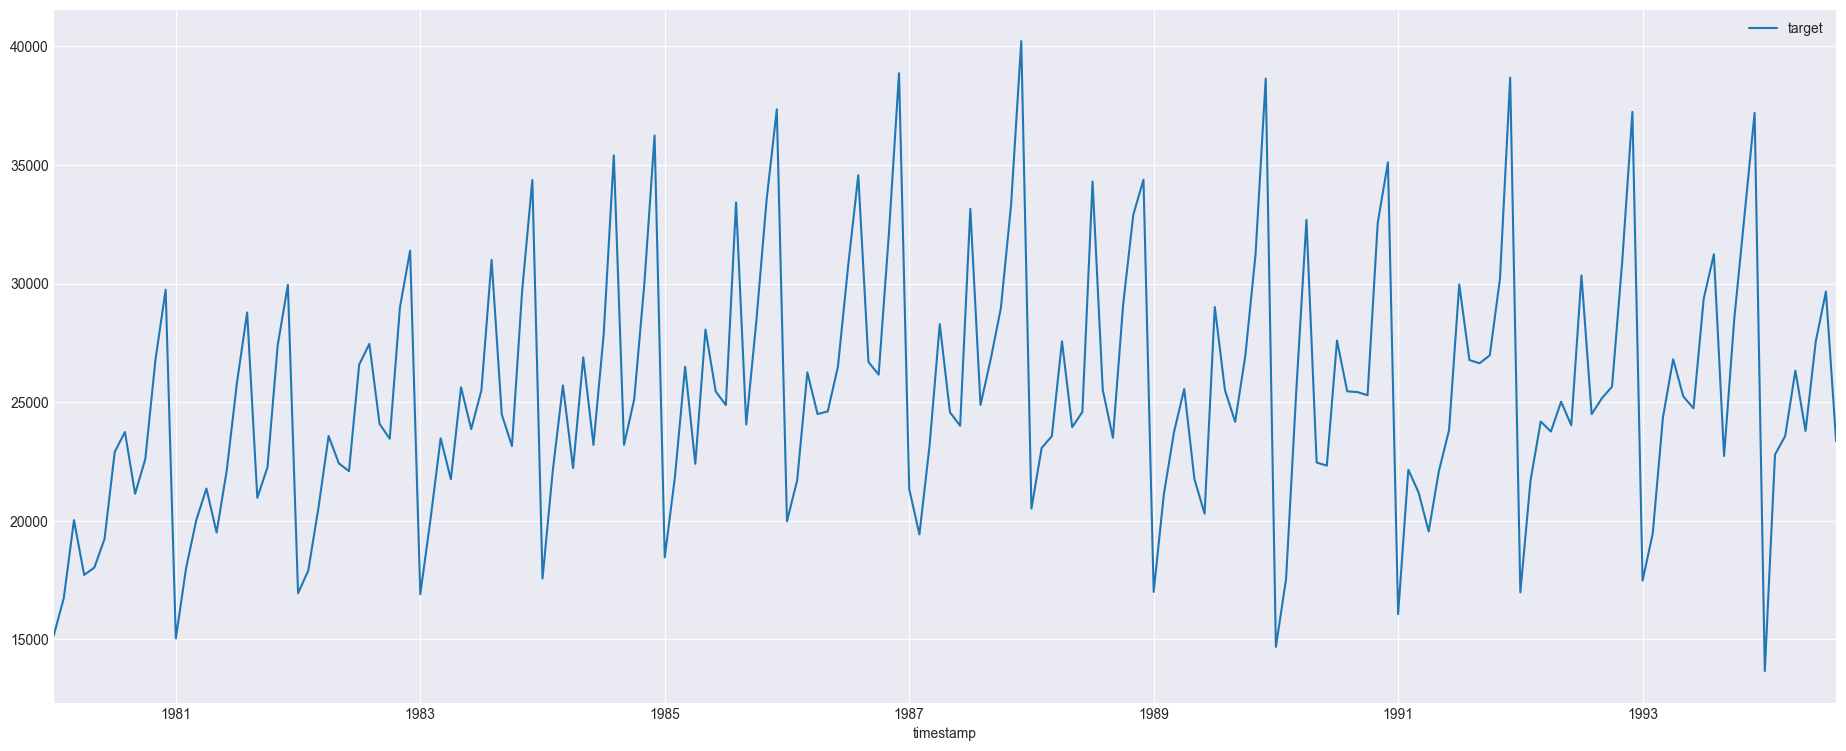

In [5]:
df.set_index("timestamp").plot(y="target")

## 2. Panel Univariate

Обычно есть колонки:
- timestamp -- время измерения
- segment -- колонка или группа колонок, обозначающих "экземпляр"
- target - значение измерения

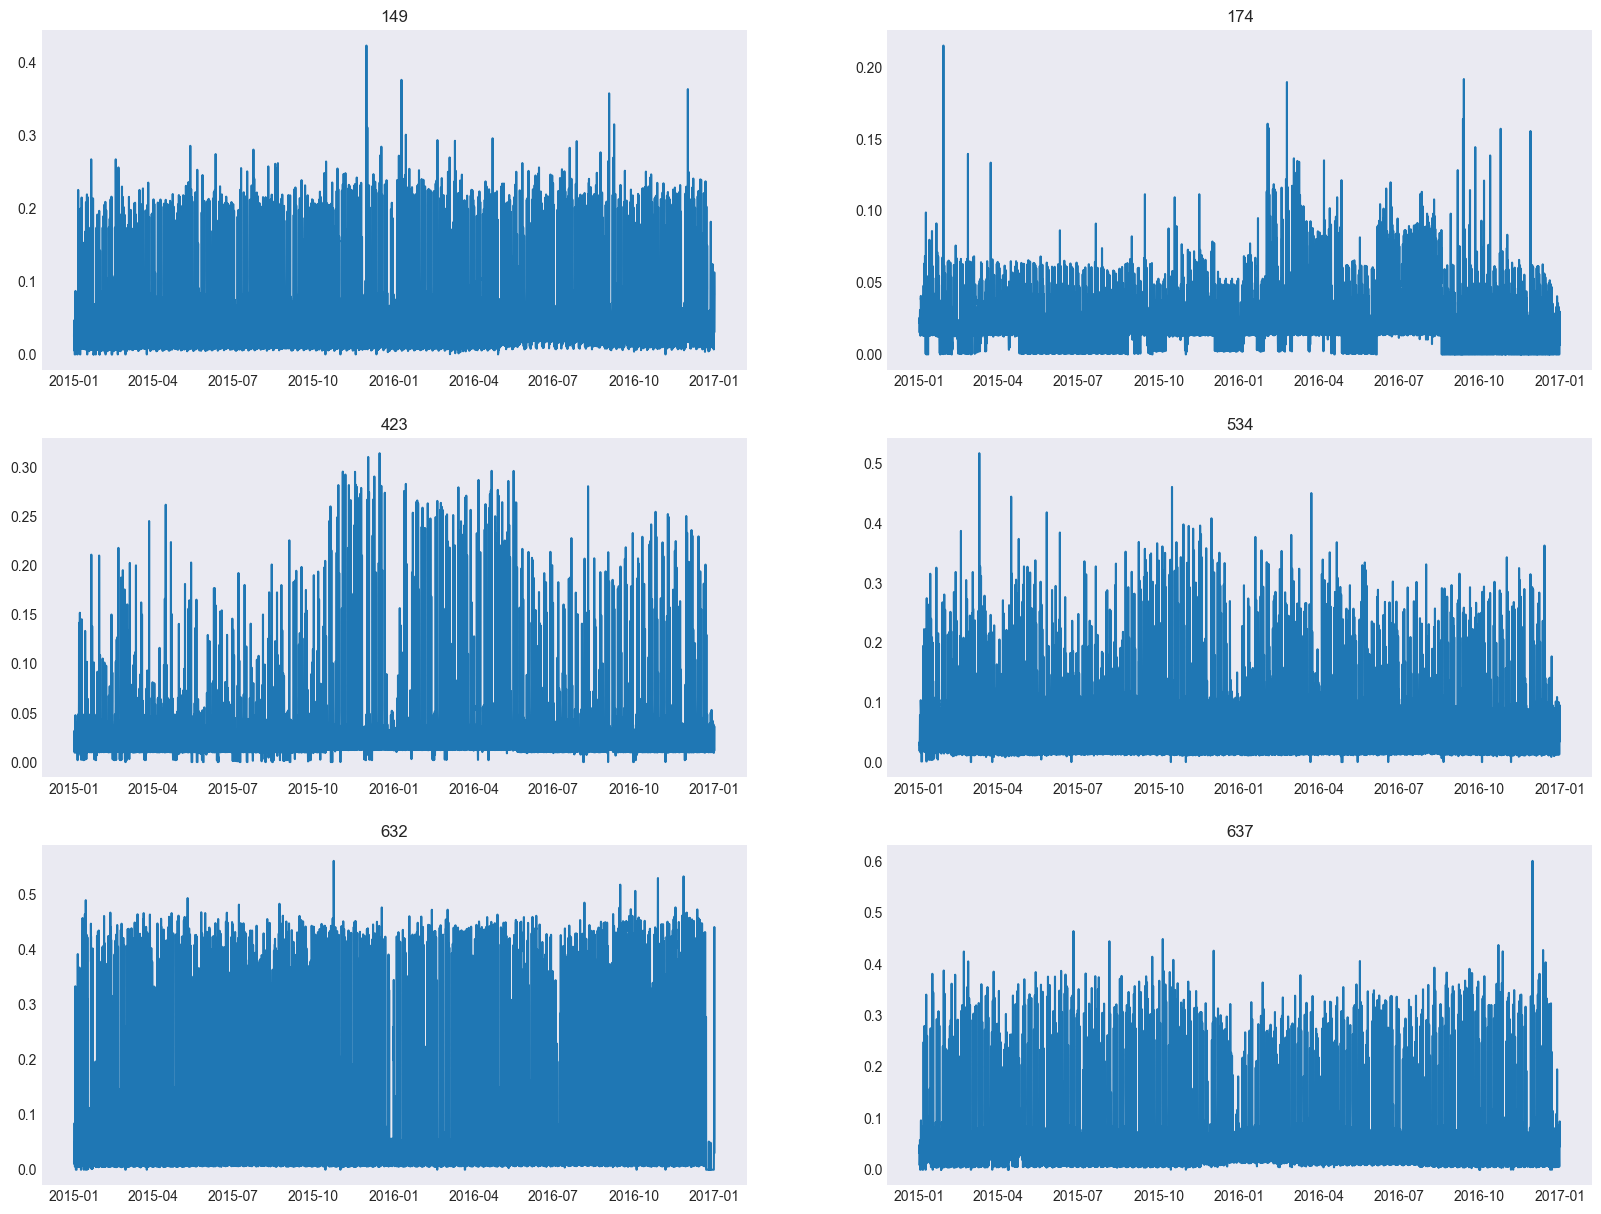

In [6]:
ts = load_dataset(name="traffic_2015_hourly", download_path=Path("data/"))
ts.plot(n_segments=6)

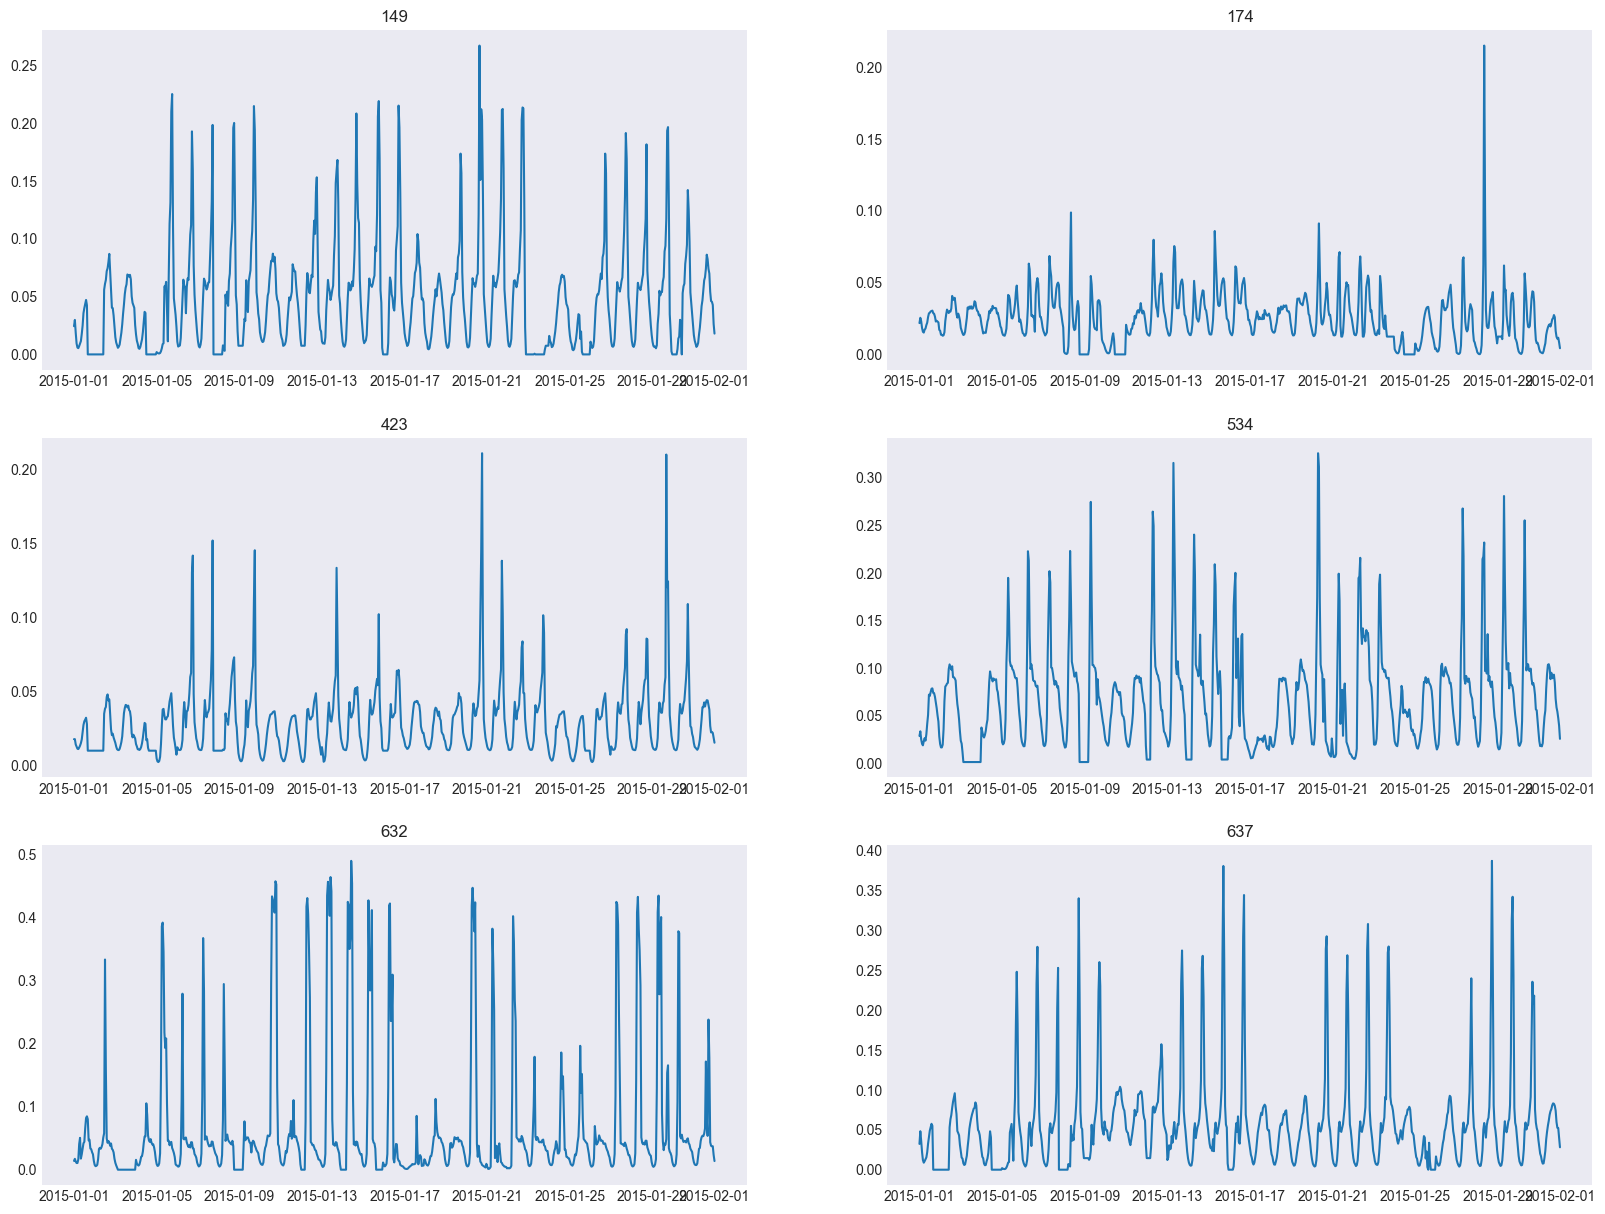

In [7]:
ts.plot(n_segments=6, start="2015-01-01", end="2015-02-01")  # Посмотрим поближе

Можем перевести данные в wide формат -- каждая колонка это отдельный ряд

In [8]:
df = ts.to_pandas(flatten=True)
df_panel = df.pivot(index="timestamp", columns="segment", values="target")
df_panel.head()

segment                   0       1      10     100     101     102     103  \
timestamp                                                                     
2015-01-01 00:00:00  0.0048  0.0146  0.0144  0.0128  0.0148  0.0170  0.0186   
2015-01-01 01:00:00  0.0072  0.0148  0.0162  0.0143  0.0169  0.0204  0.0235   
2015-01-01 02:00:00  0.0040  0.0101  0.0122  0.0084  0.0112  0.0127  0.0235   
2015-01-01 03:00:00  0.0039  0.0060  0.0077  0.0044  0.0057  0.0087  0.0103   
2015-01-01 04:00:00  0.0042  0.0055  0.0055  0.0025  0.0038  0.0067  0.0092   

segment                 104     105     106  ...      90      91      92  \
timestamp                                    ...                           
2015-01-01 00:00:00  0.0246  0.0201  0.0079  ...  0.0330  0.0132  0.0128   
2015-01-01 01:00:00  0.0257  0.0190  0.0058  ...  0.0343  0.0173  0.0170   
2015-01-01 02:00:00  0.0200  0.0092  0.0050  ...  0.0235  0.0115  0.0105   
2015-01-01 03:00:00  0.0162  0.0107  0.0052  ...  0.0154  0.0061  0.0067   
2015-01-01 04:00:00  0.0153  0.0108  0.0071  ...  0.0129  0.0038  0.0054   

segment                  93      94      95      96      97      98      99  
timestamp                                                                    
2015-01-01 00:00:00  0.0776  0.0064  0.0324  0.0099  0.0127  0.0178  0.0132  
2015-01-01 01:00:00  0.1000  0.0083  0.0365  0.0113  0.0142  0.0206  0.0175  
2015-01-01 02:00:00  0.0860  0.0050  0.0308  0.0073  0.0094  0.0106  0.0101  
2015-01-01 03:00:00  0.0552  0.0029  0.0216  0.0056  0.0045  0.0080  0.0062  
2015-01-01 04:00:00  0.0440  0.0024  0.0187  0.0052  0.0021  0.0053  0.0040  

[5 rows x 862 columns]

<Axes: xlabel='timestamp'>

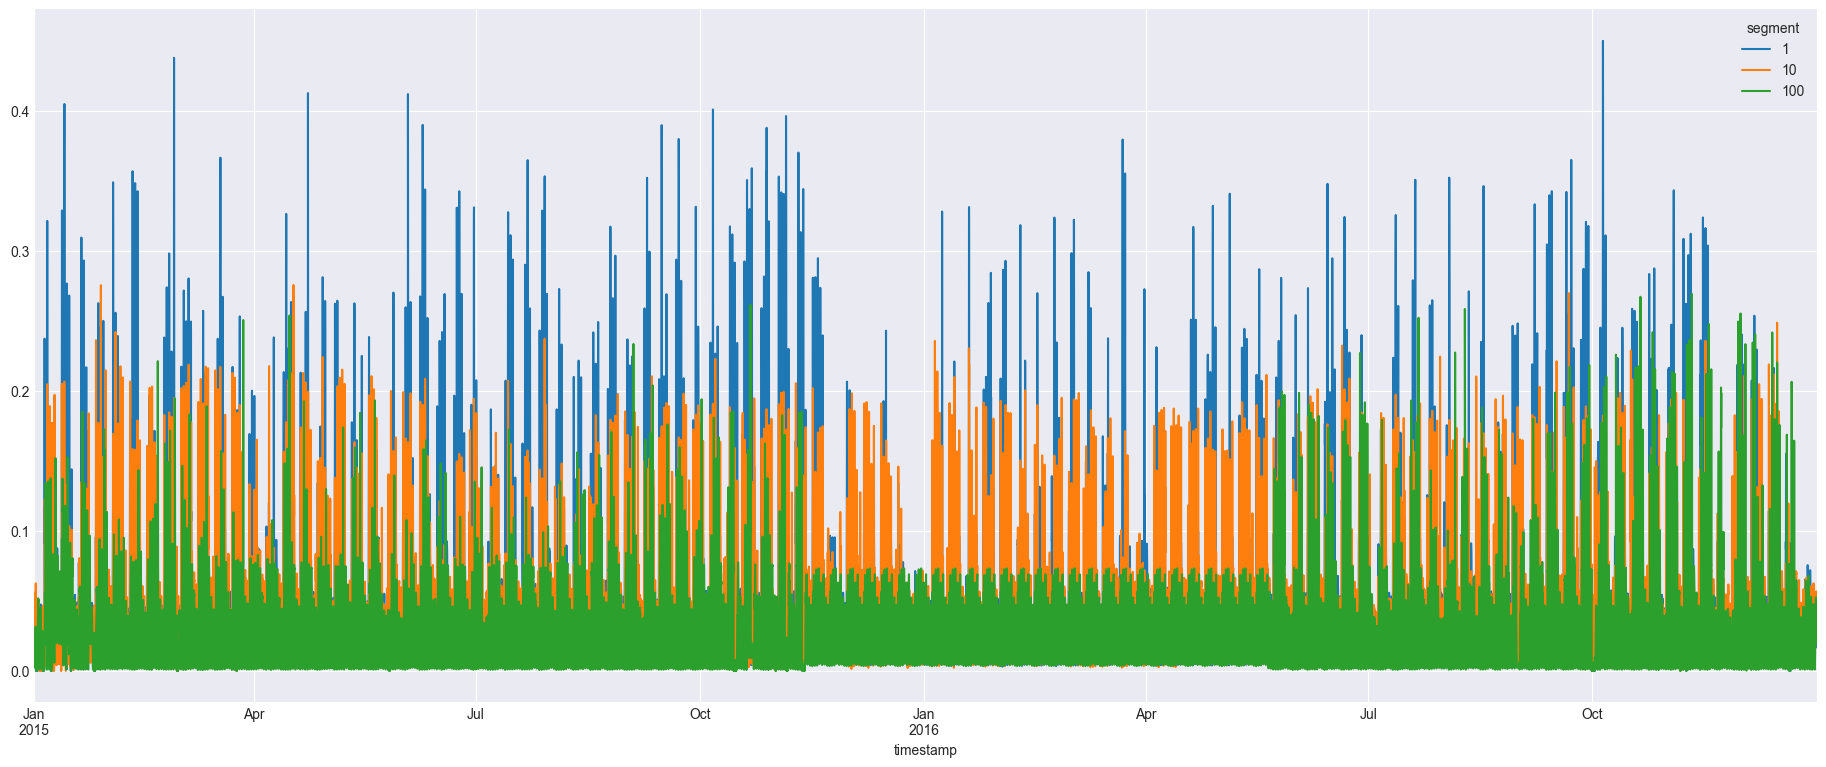

In [9]:
df_panel.plot(y=[1, 2, 3])

<Axes: xlabel='timestamp'>

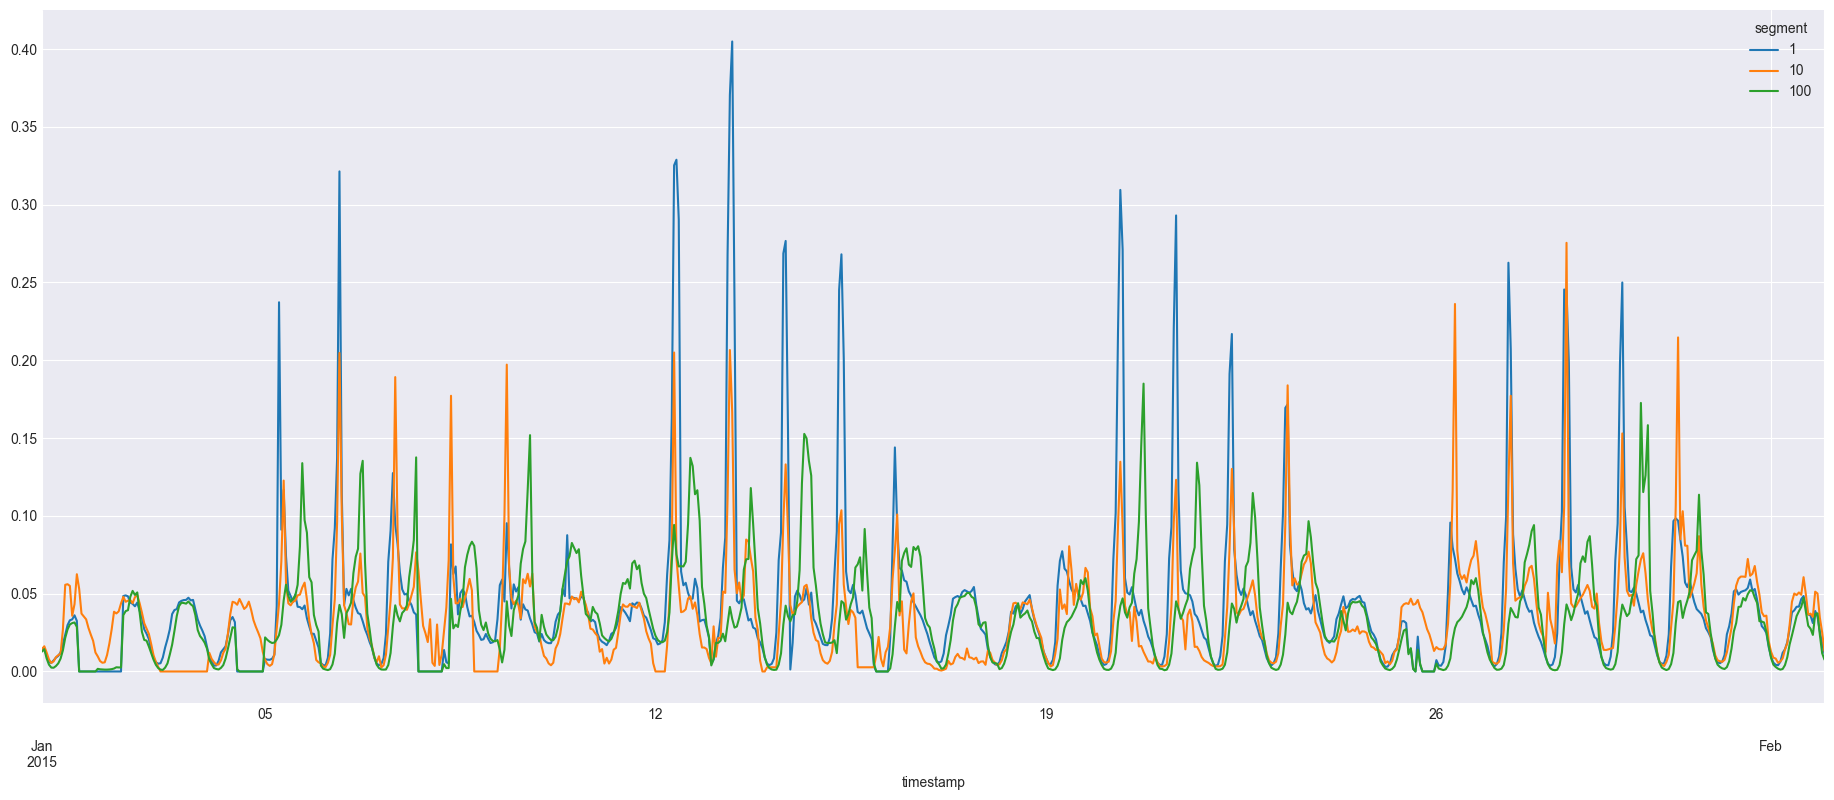

In [10]:
df_panel["2015-01-01":"2015-02-01"].plot(y=[1, 2, 3])

## 3. Panel Multivariate
Обычно есть колонки:
- timestamp -- время измерения
- segment -- колонка или группа колонок, обозначающих "экземпляр"
- target_1, target_2, ... - значение измерени для разных величин

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/etna-team/etna/refs/heads/master/examples/data/nordics_weather.csv")
df.head()

timestamp  precipitation  snow_depth       tavg      tmax       tmin  \
0  2015-01-01       1.714141  284.545455   1.428571  2.912739  -1.015287   
1  2015-01-02      10.016667  195.000000   0.553571  2.358599  -0.998718   
2  2015-01-03       3.956061  284.294118  -1.739286  0.820382  -3.463871   
3  2015-01-04       0.246193  260.772727  -7.035714 -3.110828  -9.502581   
4  2015-01-05       0.036364  236.900000 -17.164286 -8.727564 -19.004487   

                         segment  
0  Finland_KaggleMart_Kaggle Mug  
1  Finland_KaggleMart_Kaggle Mug  
2  Finland_KaggleMart_Kaggle Mug  
3  Finland_KaggleMart_Kaggle Mug  
4  Finland_KaggleMart_Kaggle Mug

У каждого экзэмпляра есть свой набор измерений

In [12]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.pivot(index="timestamp", columns="segment", values=["precipitation", "snow_depth", "tavg", "tmax", "tmin"])
df = df.reorder_levels([1, 0], axis=1)
df = df.sort_index(axis=1, level=(0, 1))
df.head()

segment    Finland_KaggleMart_Kaggle Hat                                   \
                           precipitation  snow_depth       tavg      tmax   
timestamp                                                                   
2015-01-01                      1.714141  284.545455   1.428571  2.912739   
2015-01-02                     10.016667  195.000000   0.553571  2.358599   
2015-01-03                      3.956061  284.294118  -1.739286  0.820382   
2015-01-04                      0.246193  260.772727  -7.035714 -3.110828   
2015-01-05                      0.036364  236.900000 -17.164286 -8.727564   

segment               Finland_KaggleMart_Kaggle Mug                         \
                 tmin                 precipitation  snow_depth       tavg   
timestamp                                                                    
2015-01-01  -1.015287                      1.714141  284.545455   1.428571   
2015-01-02  -0.998718                     10.016667  195.000000   0.553571   
2015-01-03  -3.463871                      3.956061  284.294118  -1.739286   
2015-01-04  -9.502581                      0.246193  260.772727  -7.035714   
2015-01-05 -19.004487                      0.036364  236.900000 -17.164286   

segment                          ... Sweden_KaggleRama_Kaggle Mug             \
                tmax       tmin  ...                precipitation snow_depth   
timestamp                        ...                                           
2015-01-01  2.912739  -1.015287  ...                     3.642278  84.924623   
2015-01-02  2.358599  -0.998718  ...                     2.414665  67.043702   
2015-01-03  0.820382  -3.463871  ...                     0.212793  79.945946   
2015-01-04 -3.110828  -9.502581  ...                     0.226833  78.997290   
2015-01-05 -8.727564 -19.004487  ...                     0.515601  79.736148   

segment                              Sweden_KaggleRama_Kaggle Sticker  \
            tavg      tmax      tmin                    precipitation   
timestamp                                                               
2015-01-01  3.47  5.415354  0.221569                         3.642278   
2015-01-02  3.80  5.097244  0.294882                         2.414665   
2015-01-03  1.61  2.140392 -1.776680                         0.212793   
2015-01-04 -1.35 -0.648425 -5.173123                         0.226833   
2015-01-05 -4.27 -3.027451 -9.544488                         0.515601   

segment                                          
           snow_depth  tavg      tmax      tmin  
timestamp                                        
2015-01-01  84.924623  3.47  5.415354  0.221569  
2015-01-02  67.043702  3.80  5.097244  0.294882  
2015-01-03  79.945946  1.61  2.140392 -1.776680  
2015-01-04  78.997290 -1.35 -0.648425 -5.173123  
2015-01-05  79.736148 -4.27 -3.027451 -9.544488  

[5 rows x 90 columns]

<Axes: xlabel='timestamp'>

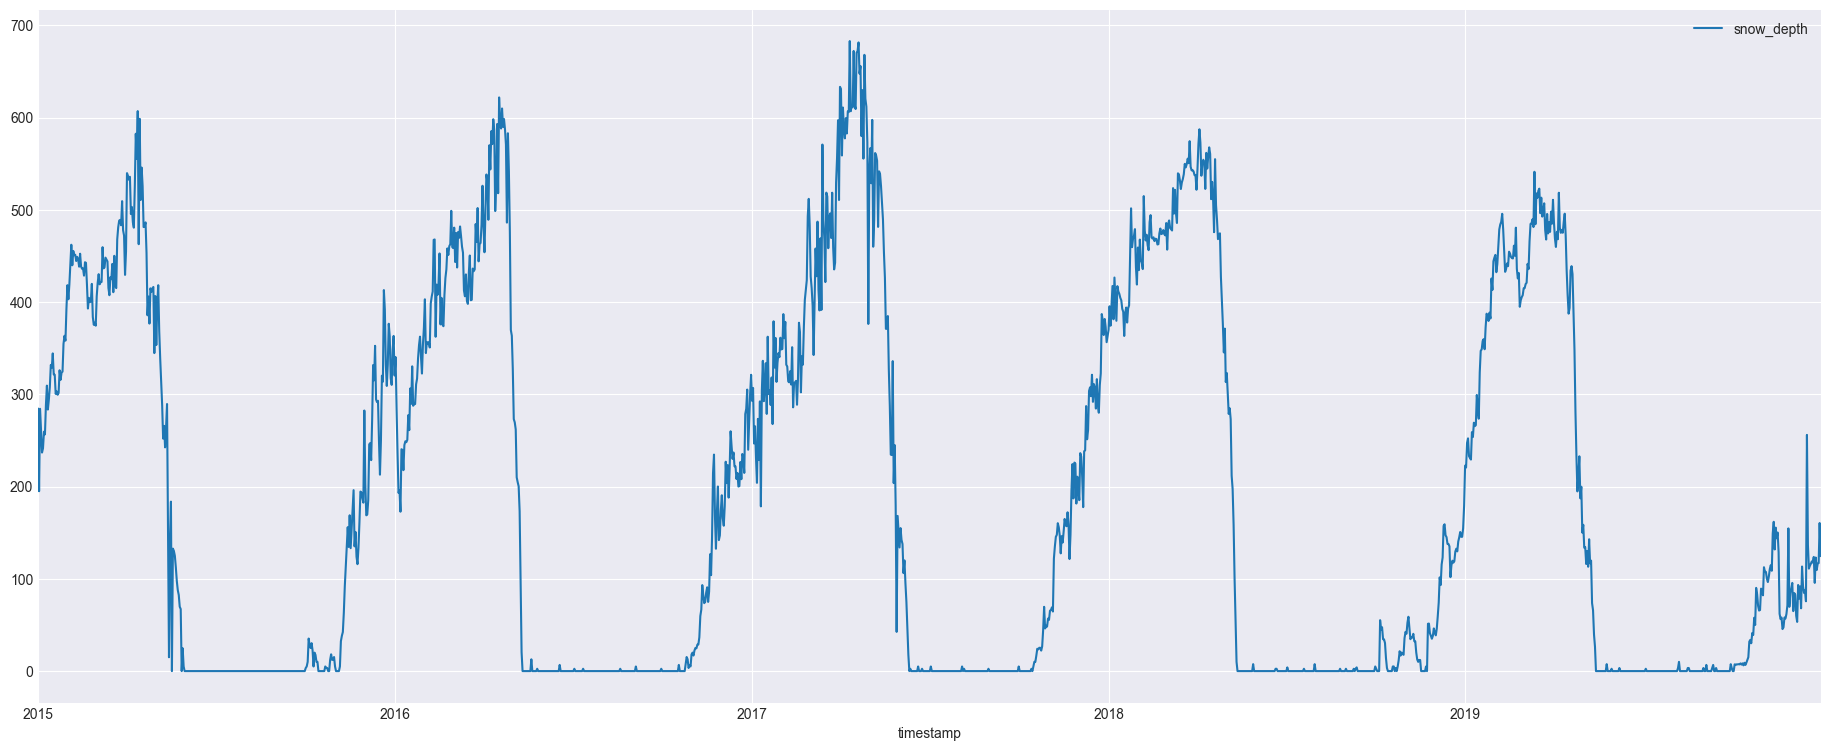

In [13]:
df["Finland_KaggleMart_Kaggle Hat"].plot(y="snow_depth")

<Axes: xlabel='timestamp'>

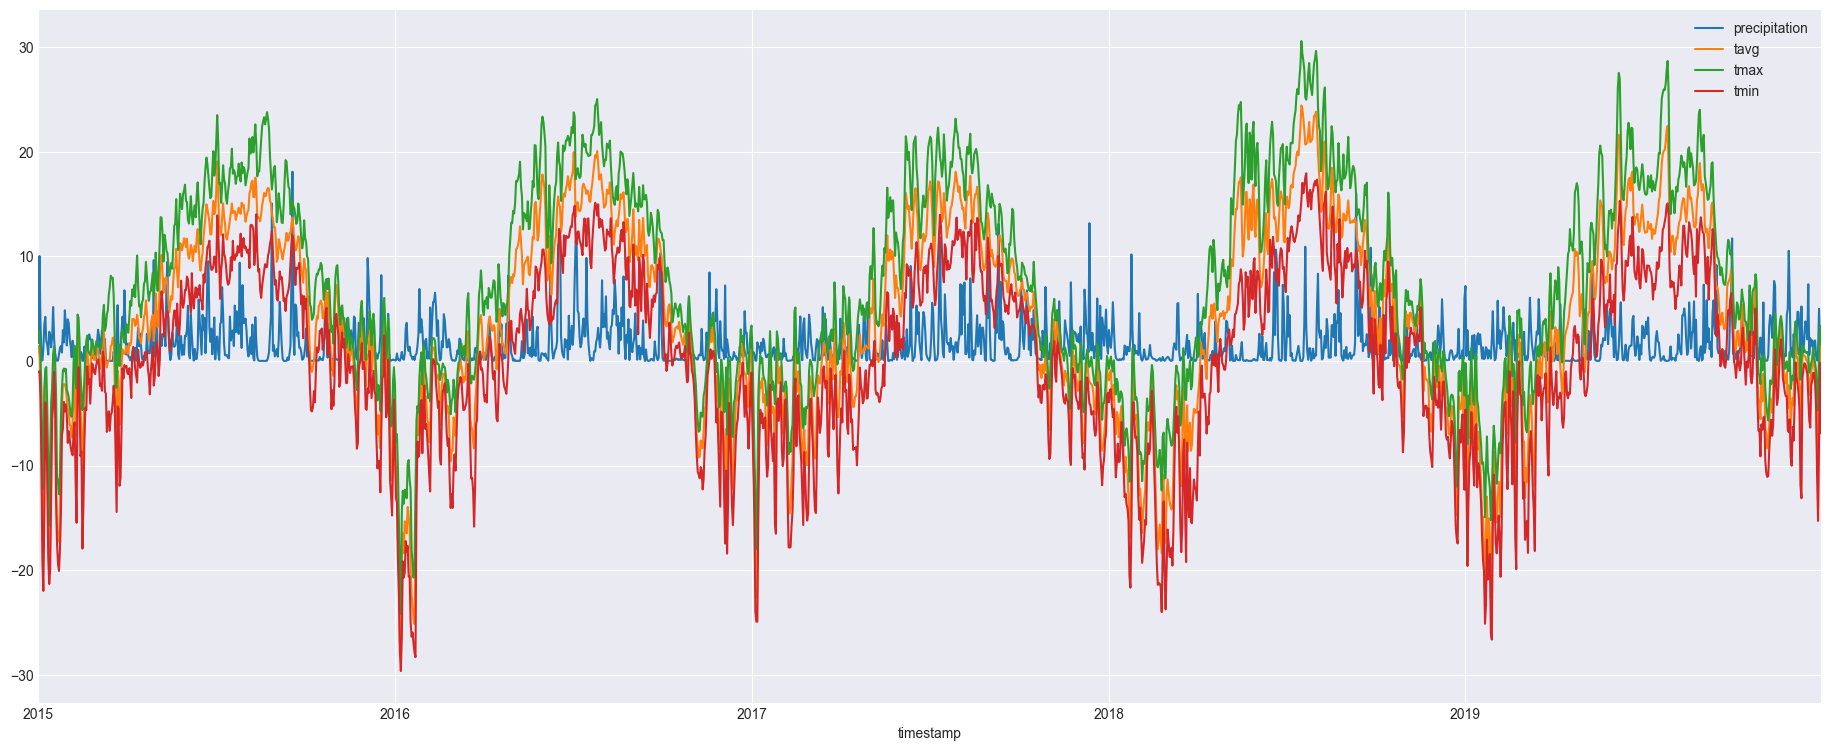

In [14]:
df["Finland_KaggleMart_Kaggle Hat"].drop(columns="snow_depth").plot()

## 4. Hierarchical 

Посмотрим как выглядят ряды с иерархической структурой.

Обычно есть колонки:

- timestamp -- время измерения
- level_1, level_2, ... -- группа колонок категориалього типа, описывающих путь в дереве иерархии до текущего уровня
- target - значение измерения

In [15]:
df_group = pd.read_csv(
    "https://raw.githubusercontent.com/etna-team/etna/refs/heads/master/examples/data/nordic_merch_sales.csv"
)
df_group.head()

timestamp  target                            segment
0  2015-01-01     329      Finland_KaggleMart_Kaggle Mug
1  2015-01-01     520      Finland_KaggleMart_Kaggle Hat
2  2015-01-01     146  Finland_KaggleMart_Kaggle Sticker
3  2015-01-01     572      Finland_KaggleRama_Kaggle Mug
4  2015-01-01     911      Finland_KaggleRama_Kaggle Hat

В нашем случае мы имеем дело с **групповой структурой** -- то есть можем переставлять уровни иерархии
- "country" -> "market" -> "product"
- "country" -> "product" -> "market"

In [16]:
df_group[["country", "market", "product"]] = df_group["segment"].astype("string").str.split("_", expand=True)
df_group.head()

timestamp  target                            segment  country      market  \
0  2015-01-01     329      Finland_KaggleMart_Kaggle Mug  Finland  KaggleMart   
1  2015-01-01     520      Finland_KaggleMart_Kaggle Hat  Finland  KaggleMart   
2  2015-01-01     146  Finland_KaggleMart_Kaggle Sticker  Finland  KaggleMart   
3  2015-01-01     572      Finland_KaggleRama_Kaggle Mug  Finland  KaggleRama   
4  2015-01-01     911      Finland_KaggleRama_Kaggle Hat  Finland  KaggleRama   

          product  
0      Kaggle Mug  
1      Kaggle Hat  
2  Kaggle Sticker  
3      Kaggle Mug  
4      Kaggle Hat

Перейдем на более высокий уровень иерархии

In [17]:
df_group_country_market_level = df_group.groupby(["timestamp", "country", "market"], as_index=False)["target"].sum()
df_group_country_market_level.head()

timestamp  country      market  target
0  2015-01-01  Finland  KaggleMart     995
1  2015-01-01  Finland  KaggleRama    1766
2  2015-01-01   Norway  KaggleMart    1682
3  2015-01-01   Norway  KaggleRama    2861
4  2015-01-01   Sweden  KaggleMart    1239

<Axes: xlabel='timestamp'>

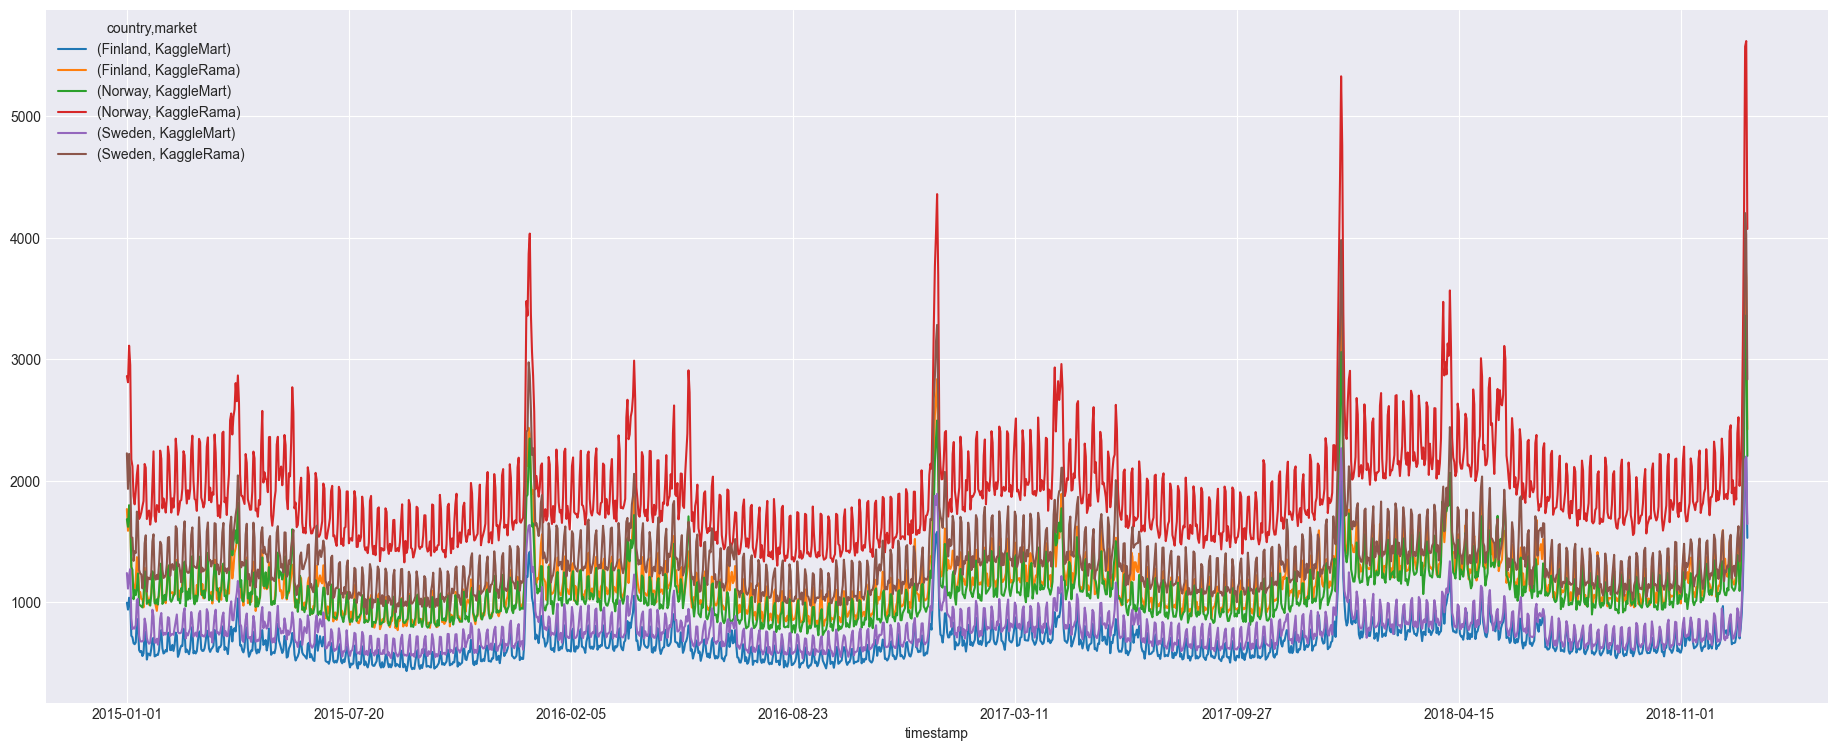

In [18]:
df_group_country_market_level.pivot(index="timestamp", columns=["country", "market"], values="target").plot()

А теперь альтернативный порядок

<Axes: xlabel='timestamp'>

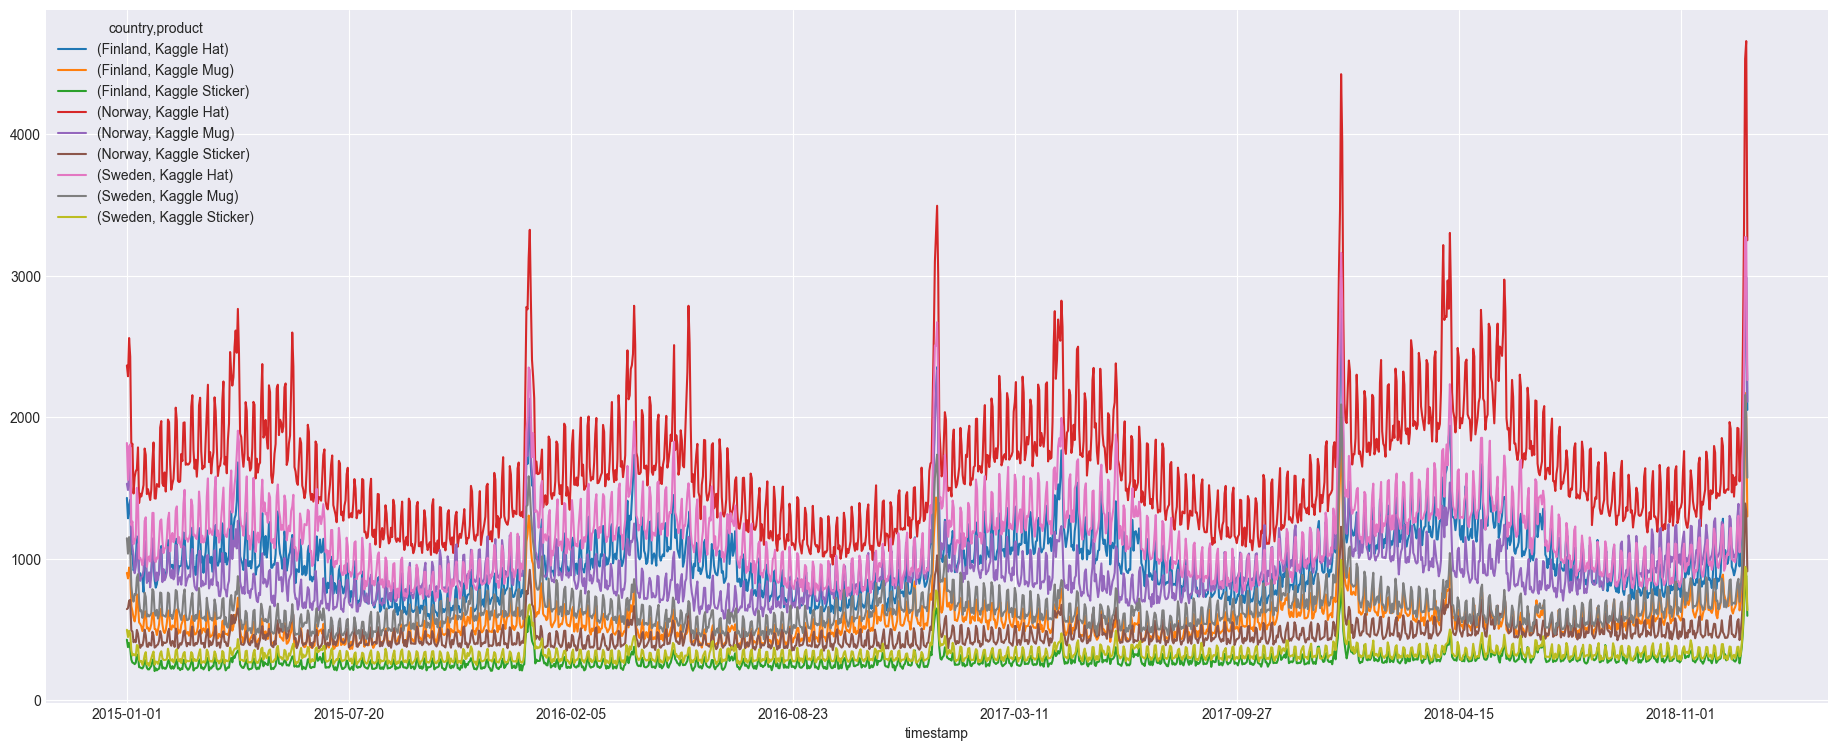

In [19]:
df_group_country_product_level = df_group.groupby(["timestamp", "country", "product"], as_index=False)["target"].sum()
df_group_country_product_level.pivot(index="timestamp", columns=["country", "product"], values="target").plot()

Еще выше

<Axes: xlabel='timestamp'>

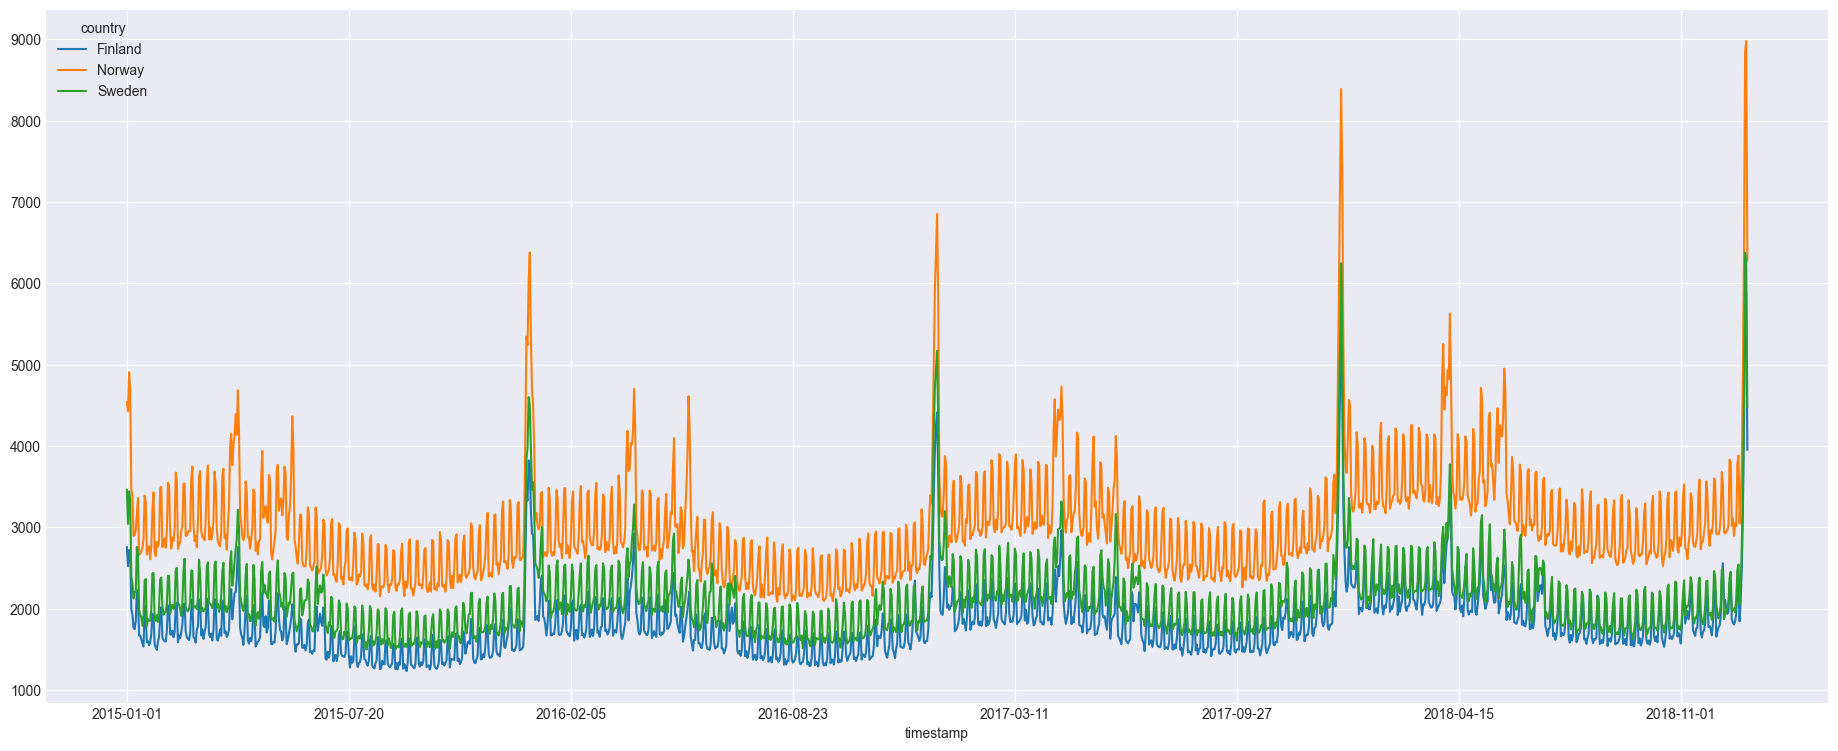

In [20]:
df_group_country_level = df_group.groupby(["timestamp", "country"], as_index=False)["target"].sum()
df_group_country_level.pivot(index="timestamp", columns="country", values="target").plot()

Самый высокий -- просто продажи всего подряд

<Axes: xlabel='timestamp'>

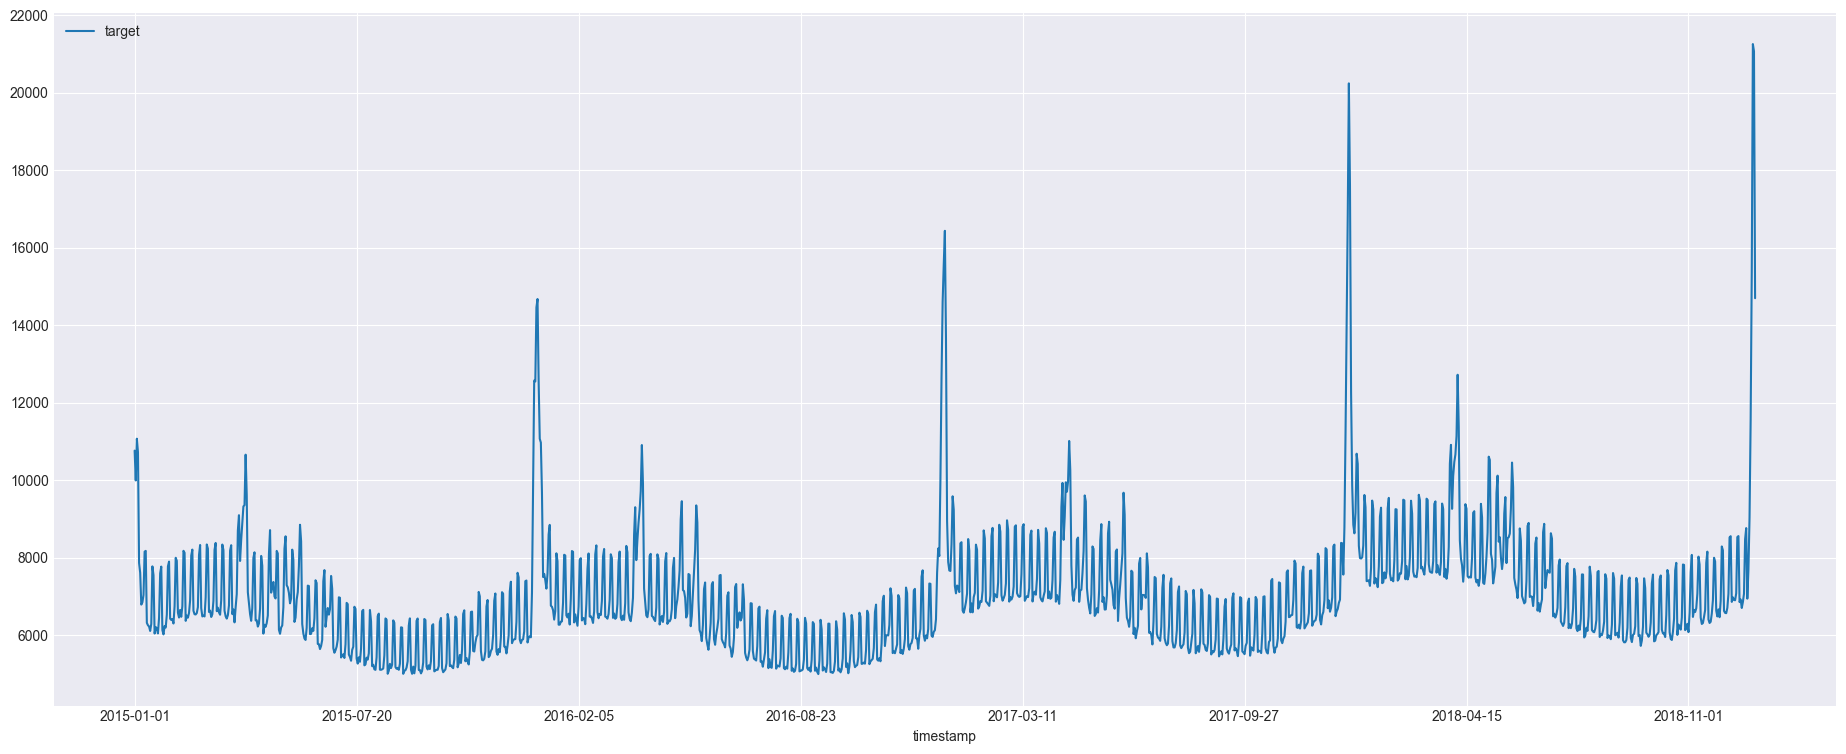

In [21]:
df_group_top_level = df_group.groupby(["timestamp"], as_index=False)["target"].sum()
df_group_top_level.set_index("timestamp").plot()

# Statsforecast

[Statsforecast](https://nixtlaverse.nixtla.io/statsforecast/index.html) -- библиотека с быстрыми реализациями классических моделей

Формат данных long(где-то мы уже это видели):
- `"unique_id"` -- уникальный айдишник ряда
- `"ds"` -- временная метка
- `"y"` -- значение временного ряда

Могут быть и другие колонки с дополнительными данными

Тут **нет специального контейнера** для работы с данныхми -- все операции с данными на вашей совести

In [22]:
from statsforecast.utils import AirPassengersDF

df = AirPassengersDF.copy()
df.head()

unique_id         ds      y
0        1.0 1949-01-31  112.0
1        1.0 1949-02-28  118.0
2        1.0 1949-03-31  132.0
3        1.0 1949-04-30  129.0
4        1.0 1949-05-31  121.0

In [23]:
from statsforecast import StatsForecast  # Основной объект для работы с моделями

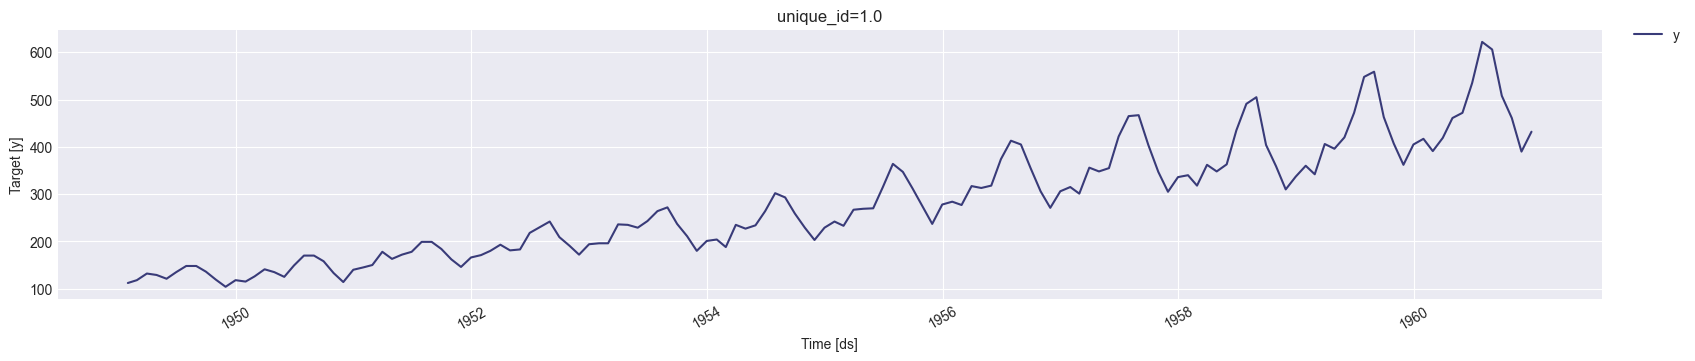

In [24]:
StatsForecast.plot(df)

#  Seasonal Moving Average

Начнем с бэйзлайн моделей

## 1. Примеры прогнозов

In [25]:
from statsforecast.models import (
    HistoricAverage,  # Срденее за все время
    Naive,  # Последнее известное значение
    SeasonalNaive,  # Последнее известное сезонное значение
    WindowAverage,  # Среднее в окне
    SeasonalWindowAverage,  # Сезонное среднее в окне
)

models = [
    HistoricAverage(),
    Naive(),
    SeasonalNaive(season_length=12),
    WindowAverage(window_size=36),
    SeasonalWindowAverage(window_size=3, season_length=12),
]

HORIZON = 12  # Горизонт прогнозирования

Есть 2 интерфейса:
1. `fit`/`predict` -- сохраняет обученные модели
2. `forecast` -- ничего не созраняет, подходит для распределенных вычисолений(будем посльзоваться им)

Большинство моделей на **numba**, при первом запуске может быть оверхэд на компиляцию

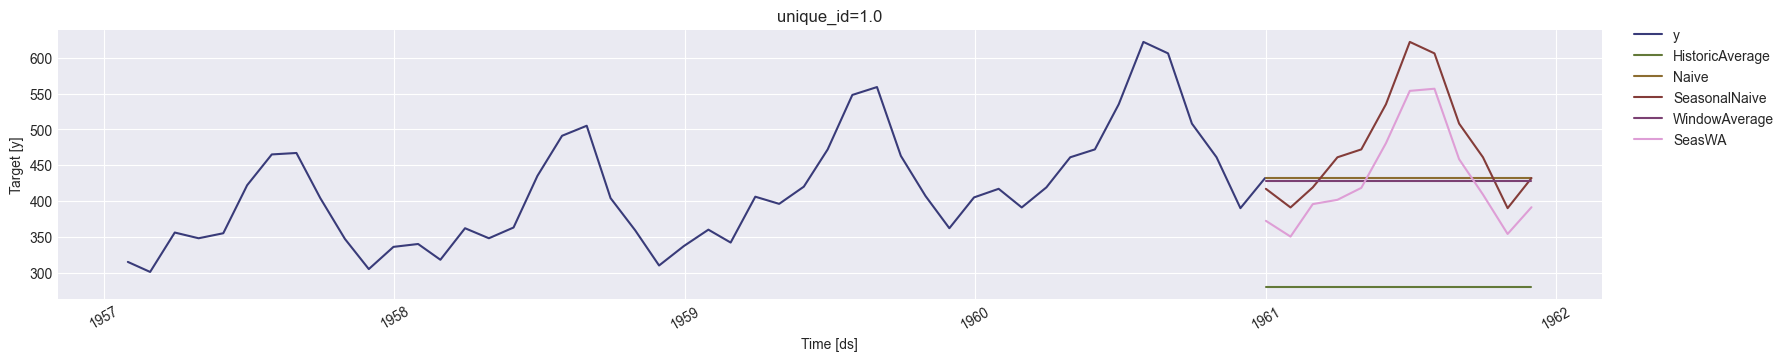

In [26]:
sf = StatsForecast(
    models=models,  # Какие модели обучаем
    freq="MS",  # Частотность данных
)
forecast_df = sf.forecast(df=df, h=HORIZON)
sf.plot(df, forecast_df, max_insample_length=12 * 4)

## 2. Кросс-валидация

В библиотеки реализованы базовые варианты кросс-валидации, логика такая
1. `cross_validation` -- получает исторические прогнозы на каждом тестовом фолде
2. Дальше делаем с ними что хотим(картинки/метрики) 

![](https://raw.githubusercontent.com/Nixtla/statsforecast/main/nbs/imgs/ChainedWindows.gif)

In [27]:
N_FOLDS = 3  # Количество фолдов валидации

### 2.1 Исторические прогнозы

In [28]:
cv_df = sf.cross_validation(
    df=df,
    h=HORIZON,  # Горизонт прогнозирования
    step_size=HORIZON,  # Сдвиг между фолдами
    n_windows=N_FOLDS,  # Количество фолдов
)
cv_df.head()

unique_id         ds     cutoff      y  HistoricAverage  Naive  \
0        1.0 1958-01-31 1957-12-31  340.0       230.898148  336.0   
1        1.0 1958-02-28 1957-12-31  318.0       230.898148  336.0   
2        1.0 1958-03-31 1957-12-31  362.0       230.898148  336.0   
3        1.0 1958-04-30 1957-12-31  348.0       230.898148  336.0   
4        1.0 1958-05-31 1957-12-31  363.0       230.898148  336.0   

   SeasonalNaive  WindowAverage      SeasWA  
0          315.0     326.888889  280.333333  
1          301.0     326.888889  270.333333  
2          356.0     326.888889  313.333333  
3          348.0     326.888889  310.000000  
4          355.0     326.888889  314.333333

### 2.2 Картинка

In [29]:
def plot_cv(df, cv_df):
    cv_df = cv_df.copy()
    cv_df.rename(columns={"y": "actual"}, inplace=True)
    cutoff = cv_df["cutoff"].unique()
    for k in range(len(cutoff)):
        cv = cv_df[cv_df["cutoff"] == cutoff[k]]
        display(StatsForecast.plot(df, cv.loc[:, cv.columns != "cutoff"]))

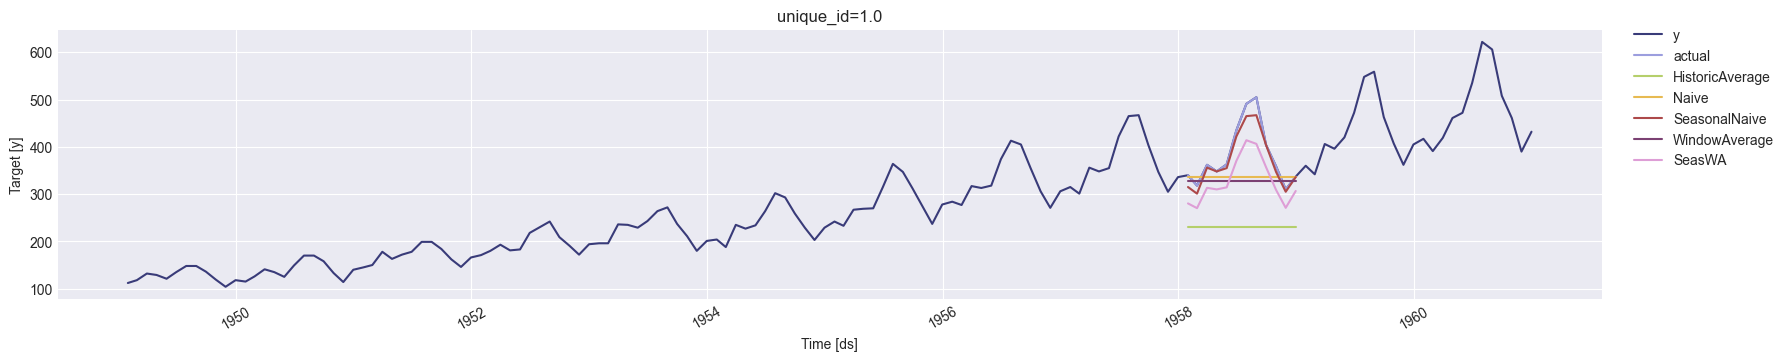

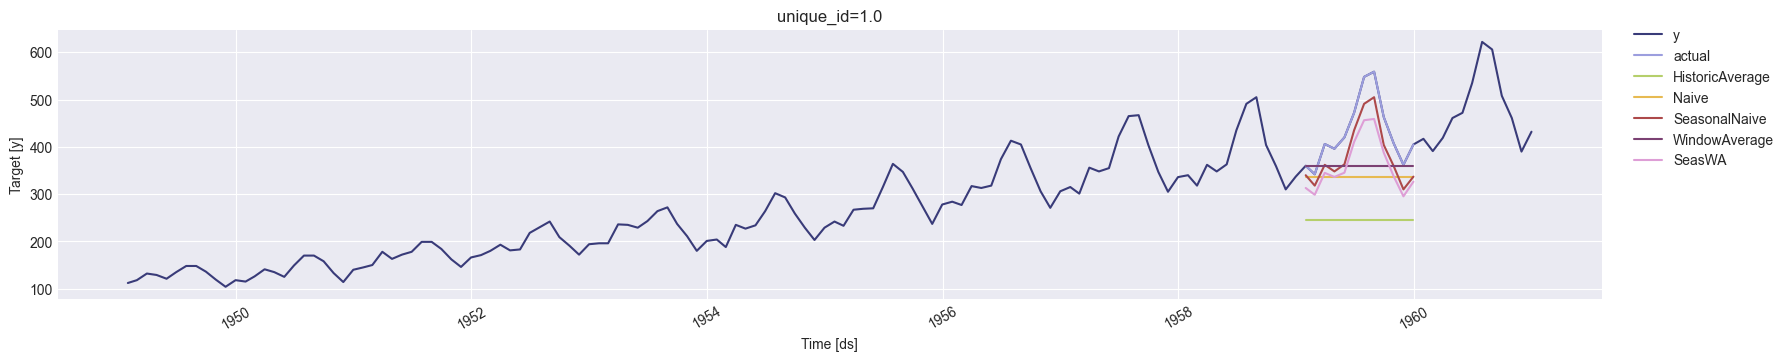

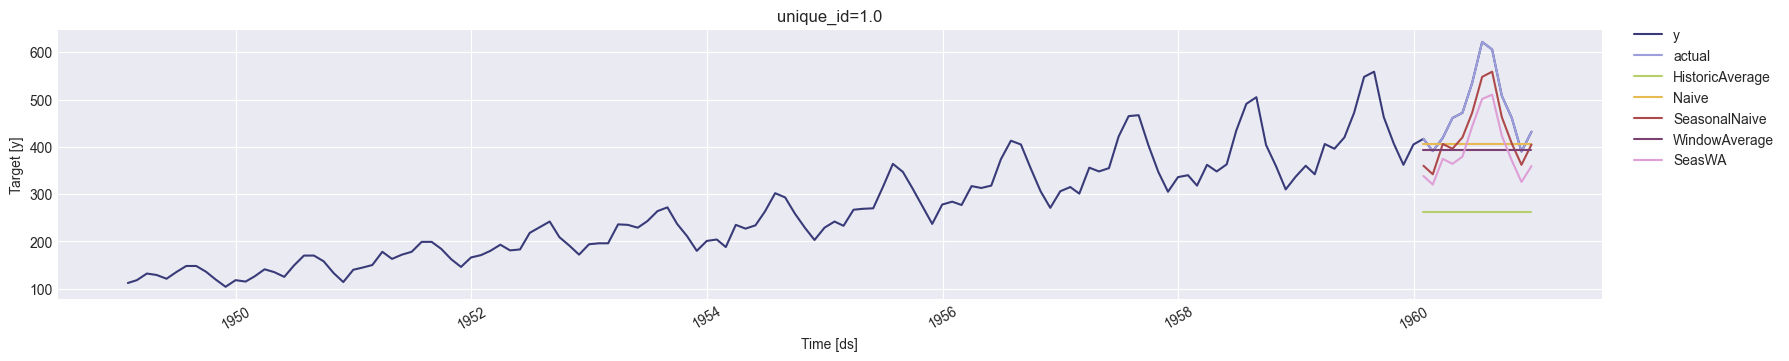

In [30]:
plot_cv(df, cv_df)

### 2.3 Оценка метрик

In [31]:
from utilsforecast.losses import mae, mape


def evaluate_cv(df, metric):
    models = df.columns.drop(["unique_id", "ds", "y", "cutoff"]).tolist()
    evals = metric(df, models=models)
    evals["best_model"] = evals[models].idxmin(axis=1)
    evals["best_metric"] = evals[models].min(axis=1)
    return evals

In [32]:
evaluate_cv(cv_df, mae)

unique_id  HistoricAverage      Naive  SeasonalNaive  WindowAverage  \
0        1.0       182.067031  73.222222      35.916667      71.555556   

      SeasWA     best_model  best_metric  
0  68.935185  SeasonalNaive    35.916667

In [33]:
evaluate_cv(cv_df, mape)

unique_id  HistoricAverage     Naive  SeasonalNaive  WindowAverage  \
0        1.0         0.409535  0.152797       0.080602       0.148202   

    SeasWA     best_model  best_metric  
0  0.15835  SeasonalNaive     0.080602

# ETS(Error, Trend, Seasonal)

Теперь попробуем более "умную" модель

## 1. Примеры прогнозов

In [34]:
from statsforecast.models import SimpleExponentialSmoothing, SimpleExponentialSmoothingOptimized, Holt, HoltWinters

models = [
    SimpleExponentialSmoothing(alpha=0.3),  # Это буквально сумма известных значений с затуханием
    SimpleExponentialSmoothingOptimized(),
    Holt(),
    HoltWinters(season_length=12),
]

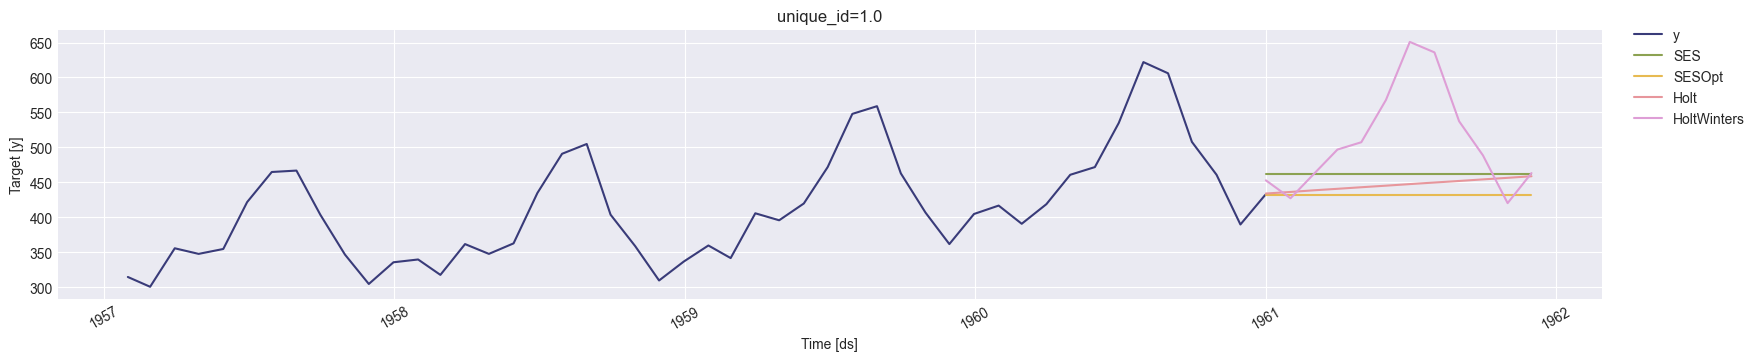

In [35]:
sf = StatsForecast(models=models, freq="MS")
forecast_df = sf.forecast(df=df, h=HORIZON)
sf.plot(df, forecast_df, max_insample_length=12 * 4)

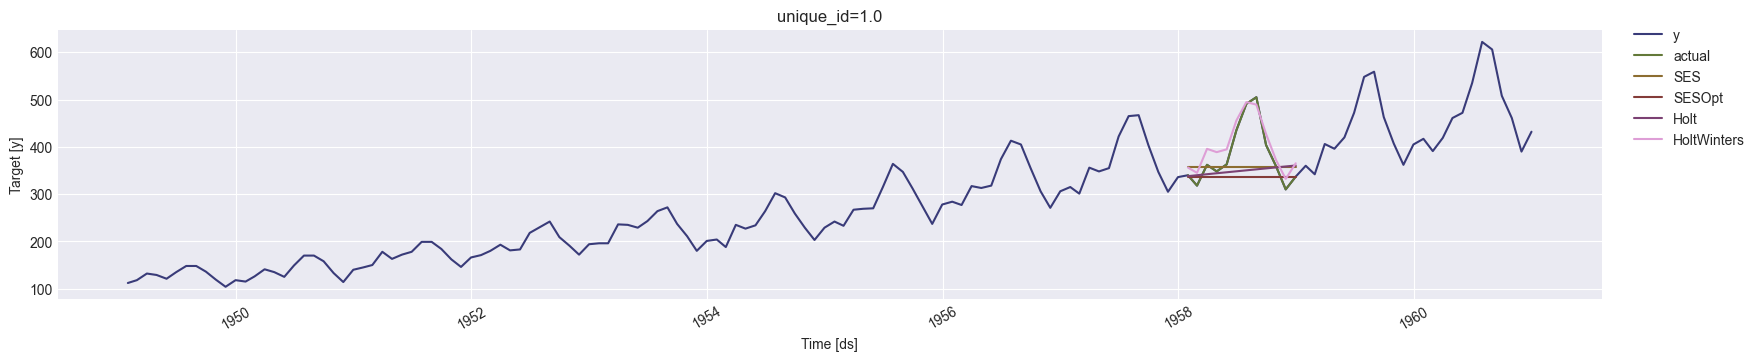

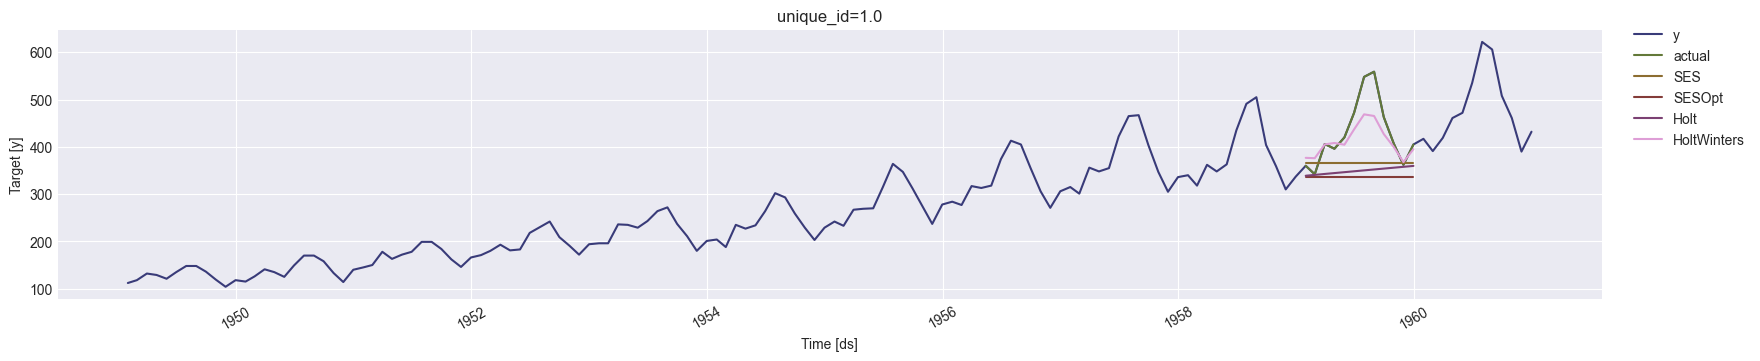

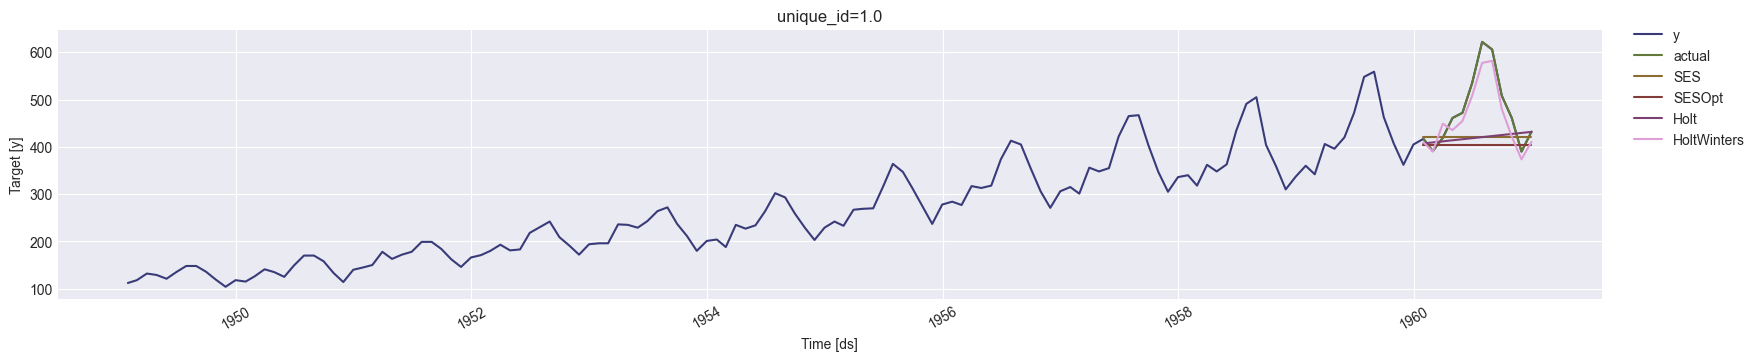

In [36]:
cv_df = sf.cross_validation(df=df, h=HORIZON, step_size=HORIZON, n_windows=N_FOLDS)
plot_cv(df, cv_df)

Получилось сильно лучше чем простое SMA

In [37]:
evaluate_cv(cv_df, mae)

unique_id        SES     SESOpt       Holt  HoltWinters   best_model  \
0        1.0  59.995646  73.473204  64.265942    25.127234  HoltWinters   

   best_metric  
0    25.127234

In [38]:
evaluate_cv(cv_df, mape)

unique_id       SES    SESOpt      Holt  HoltWinters   best_model  \
0        1.0  0.125018  0.153358  0.133986     0.057839  HoltWinters   

   best_metric  
0     0.057839

## 2. Разложение на компоненты

Модель позволяет в явно виде получать разлочение прогноза и самого ряда на компоненты(тренд/сезонность/ошибка)

К сожалению Statsforecast не самым очевидным образом зашил компоненты у себя под капотом, поэтому проделаем это упраженение с реализацией из библиотеки [statsmodels](https://www.statsmodels.org/stable/index.html) -- еще одна популярная библиотека с классическими моделями(и не только)

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data = df["y"].values

model = ExponentialSmoothing(data, seasonal_periods=12, trend="add", seasonal="add", initialization_method="estimated")
result = model.fit()

### 2.1 Компоненты in-sample (фильтрация)

Напомню формулу для ETS модели

$y_t = l_{t-1} + b_{t-1} + s_{t-s} + e_{t}$

На известных таргетах мы можем в явном виде выразить каждую из компонент, однако
-  Начальные значения (в точке t=0) это **обучаемые параметры модели**



In [40]:
df["level"] = np.concatenate([[result.params["initial_level"]], result.level[:-1]])
df["slope"] = np.concatenate([[result.params["initial_trend"]], result.trend[:-1]])
df["seasonal"] = np.concatenate([result.params["initial_seasons"], result.season[:-12]])
df["error"] = result.resid

assert np.all(df["y"] == df["level"] + df["slope"] + df["seasonal"] + df["error"])

In [41]:
def plot_components(data, level, slope, seasonal, residuals=None):
    plt.figure(figsize=(12, 10))

    # Panel 1: Observed Data
    plt.subplot(4, 1, 1)
    plt.plot(data, label="Observed Data", color="blue")
    plt.legend()
    plt.title("Observed Data vs Fitted Holt-Winters Model")

    # Panel 2: Trend Component
    plt.subplot(4, 1, 2)
    trend_component = level + slope
    plt.plot(trend_component, label="Trend", color="green")
    plt.legend()
    plt.title("Trend Component")

    # Panel 3: Seasonal Component
    plt.subplot(4, 1, 3)
    plt.plot(seasonal, label="Seasonal", color="purple")
    plt.legend()
    plt.title("Seasonal Component")

    if residuals is not None:
        # Panel 4: Residuals
        plt.subplot(4, 1, 4)
        plt.plot(residuals, label="Residuals", color="orange")
        plt.axhline(0, color="black", linestyle="--", alpha=0.5)
        plt.legend()
        plt.title("Residuals (Error)")

        plt.tight_layout()
        plt.show()

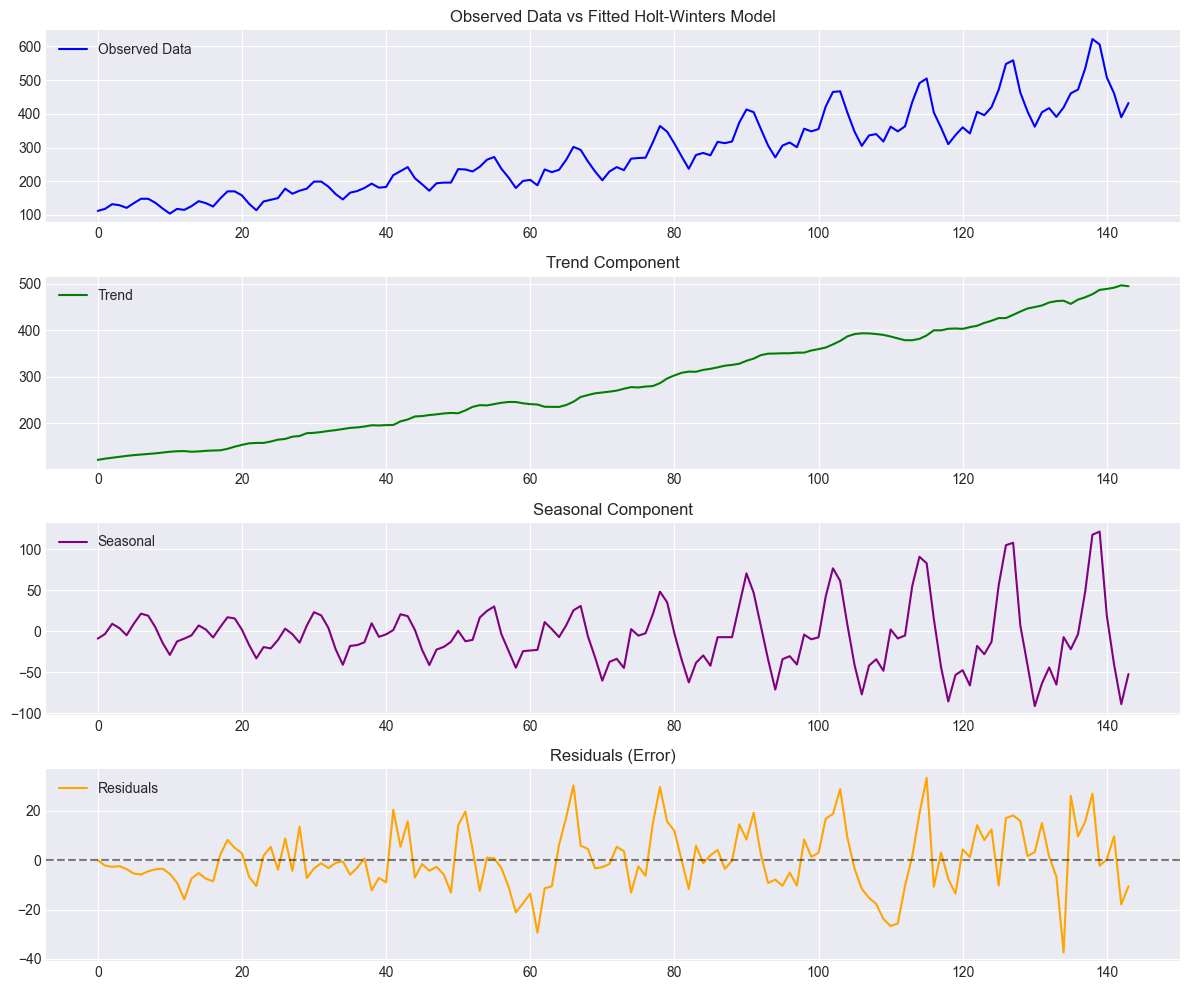

In [42]:
plot_components(data=data, level=df["level"], slope=df["slope"], seasonal=df["seasonal"], residuals=df["error"])

### 2.2 Компоненты out-sample(прогноз) -- а это домашка!

Тут уже мы прогнозируем целевую переменную, используя компоненты модели

# SARIAMX

Теперь попробуем настроить SARIMAX под наш датасет.


## 1. Настройка модели(1)

Основной алгоритм такой:
1. d,D -- делаем ряд стационарным(убираем тренд/сезонность)
2. p, P -- последний значимы лаг(сезонный лаг) на PACF
3. q, Q -- последний значимый лаг(сезонный лаг) на ACF


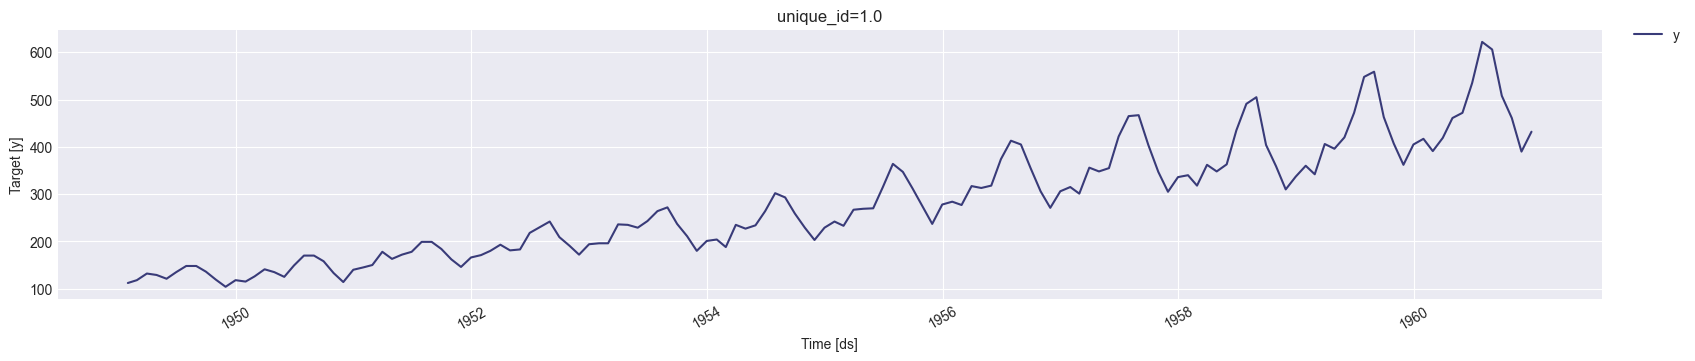

In [45]:
import statsmodels.api as sm

df = AirPassengersDF.copy()
StatsForecast.plot(df)

Для начала стабилизируем дисперсию сезонного паттерна через логорифмирование таргета(попуялрный прием)

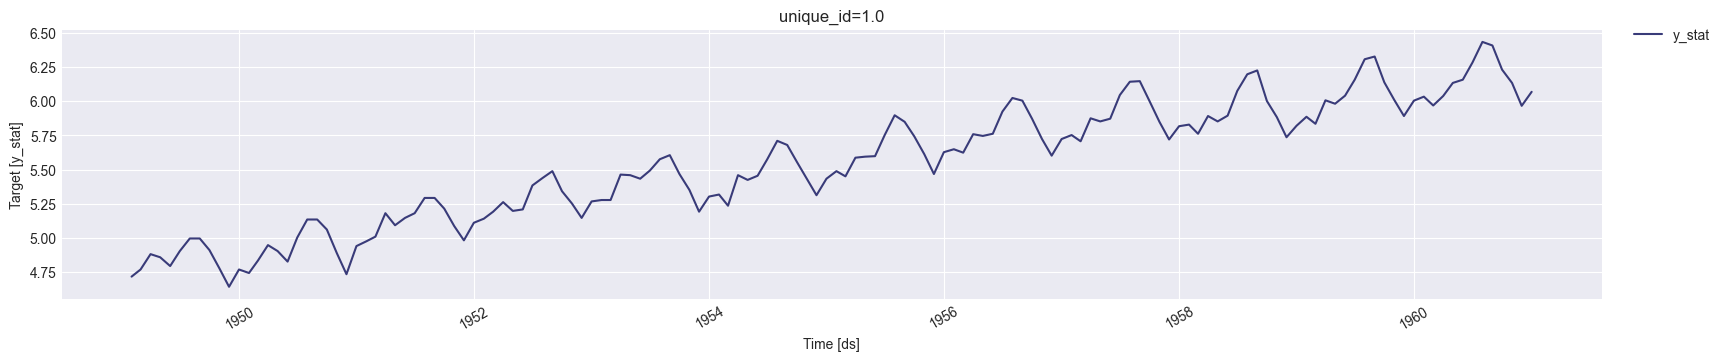

In [46]:
df["y_stat"] = np.log(df["y"])
StatsForecast.plot(df, target_col="y_stat")

Характерная картинка для рядов с трендом и сезонностью
1. Сезонность -- пики в точках = периоду сезонности
2. Тренд -- затухающие значения автокорреляции

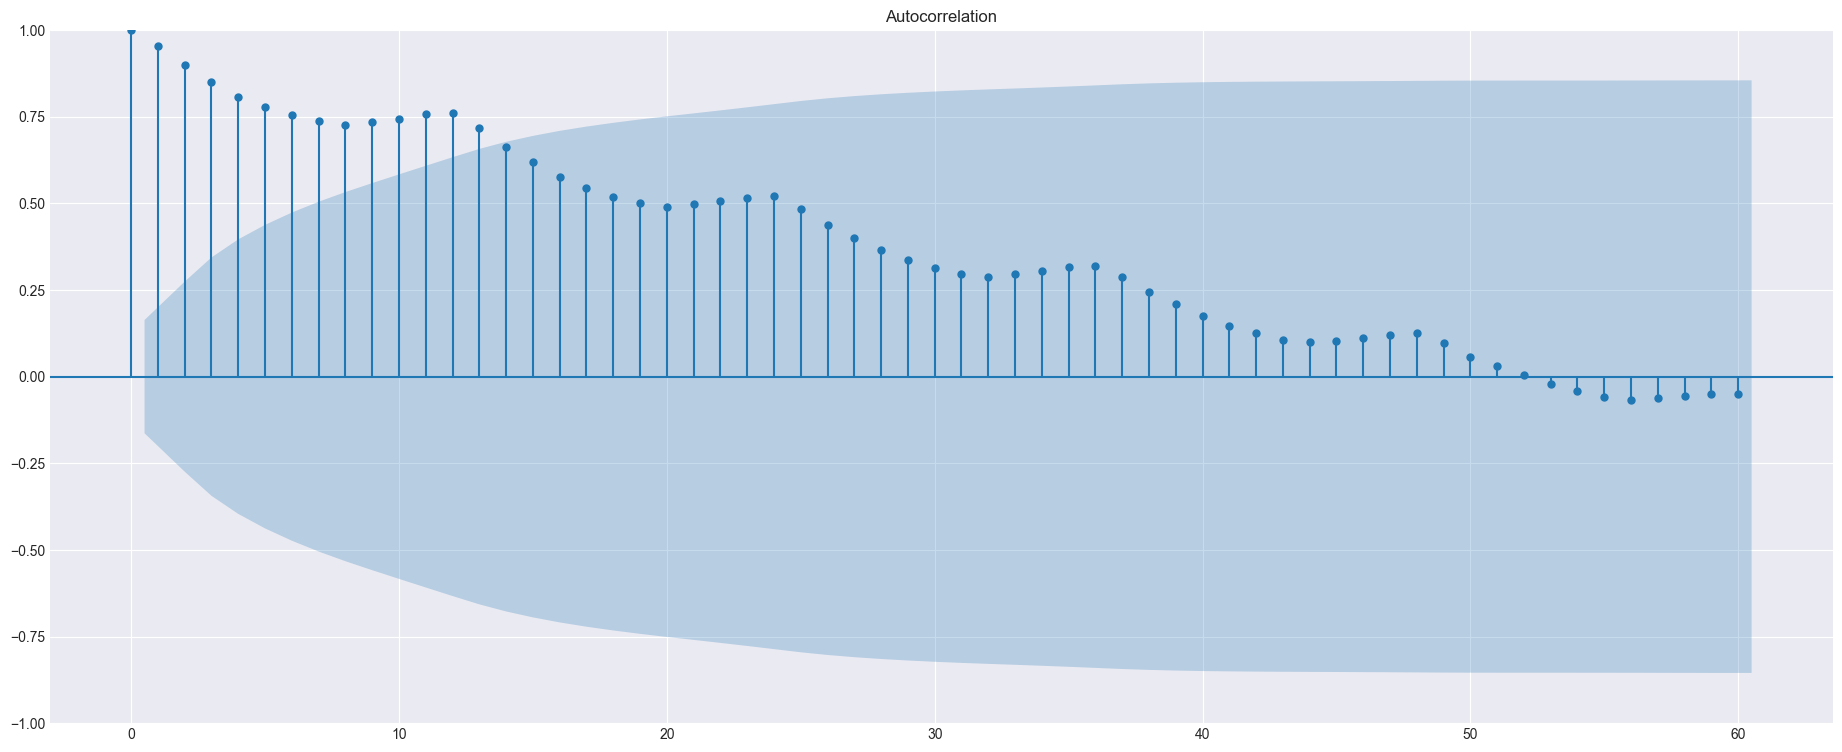

In [47]:
sm.graphics.tsa.plot_acf(df["y_stat"].values.squeeze(), lags=60);

Сделаем сезонное дифференцирование

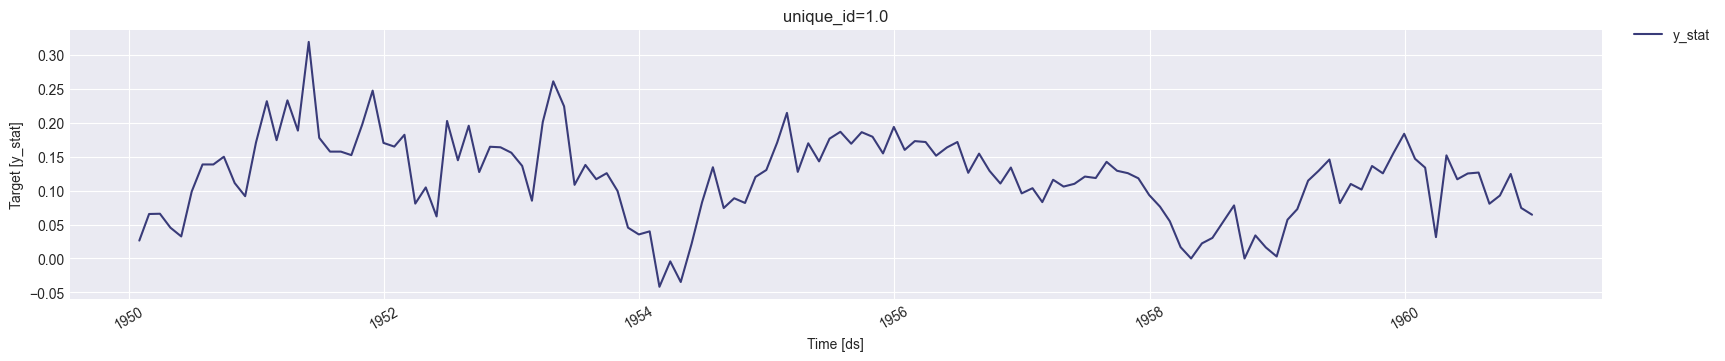

In [48]:
df["y_stat"] = df["y_stat"].diff(12)
StatsForecast.plot(df, target_col="y_stat")

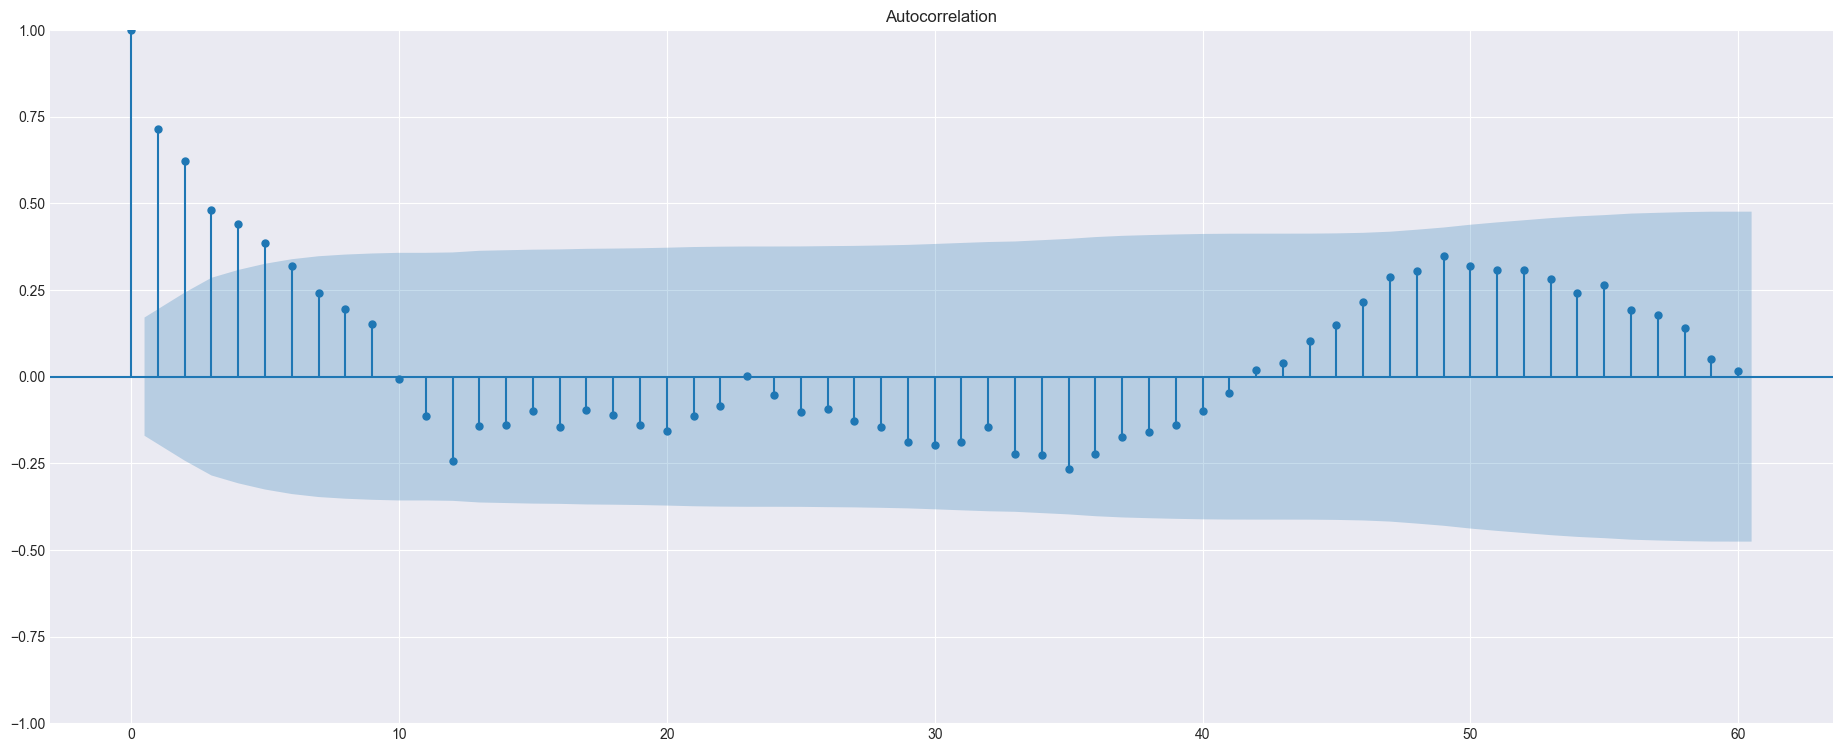

In [49]:
sm.graphics.tsa.plot_acf(df["y_stat"].dropna().values.squeeze(), lags=60);

Сделаем обычное дифференцирование

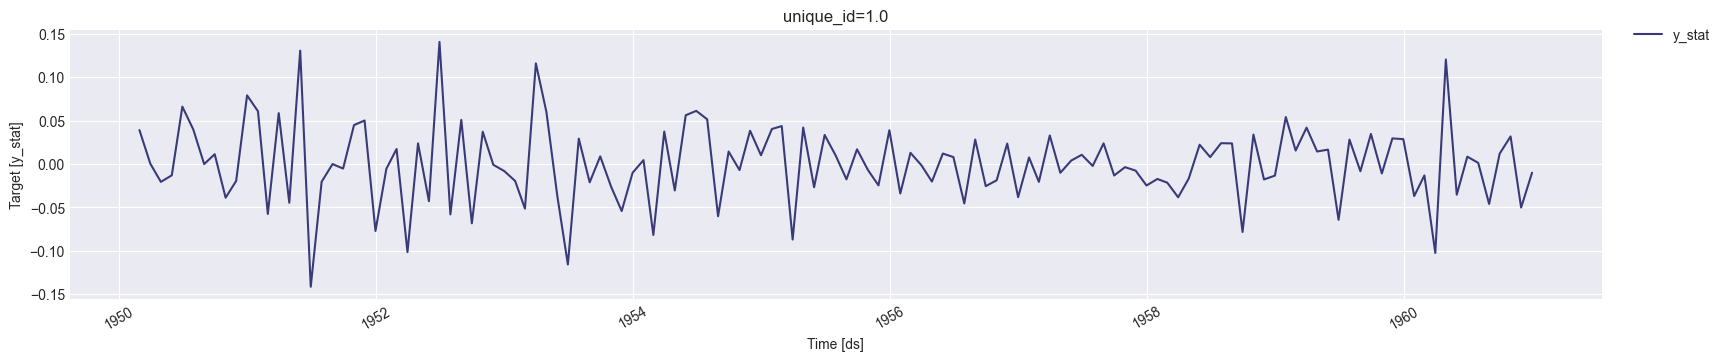

In [50]:
df["y_stat"] = df["y_stat"].diff(1)
StatsForecast.plot(df, target_col="y_stat")

Теперь ряд стал стационарным, определим значения параметров

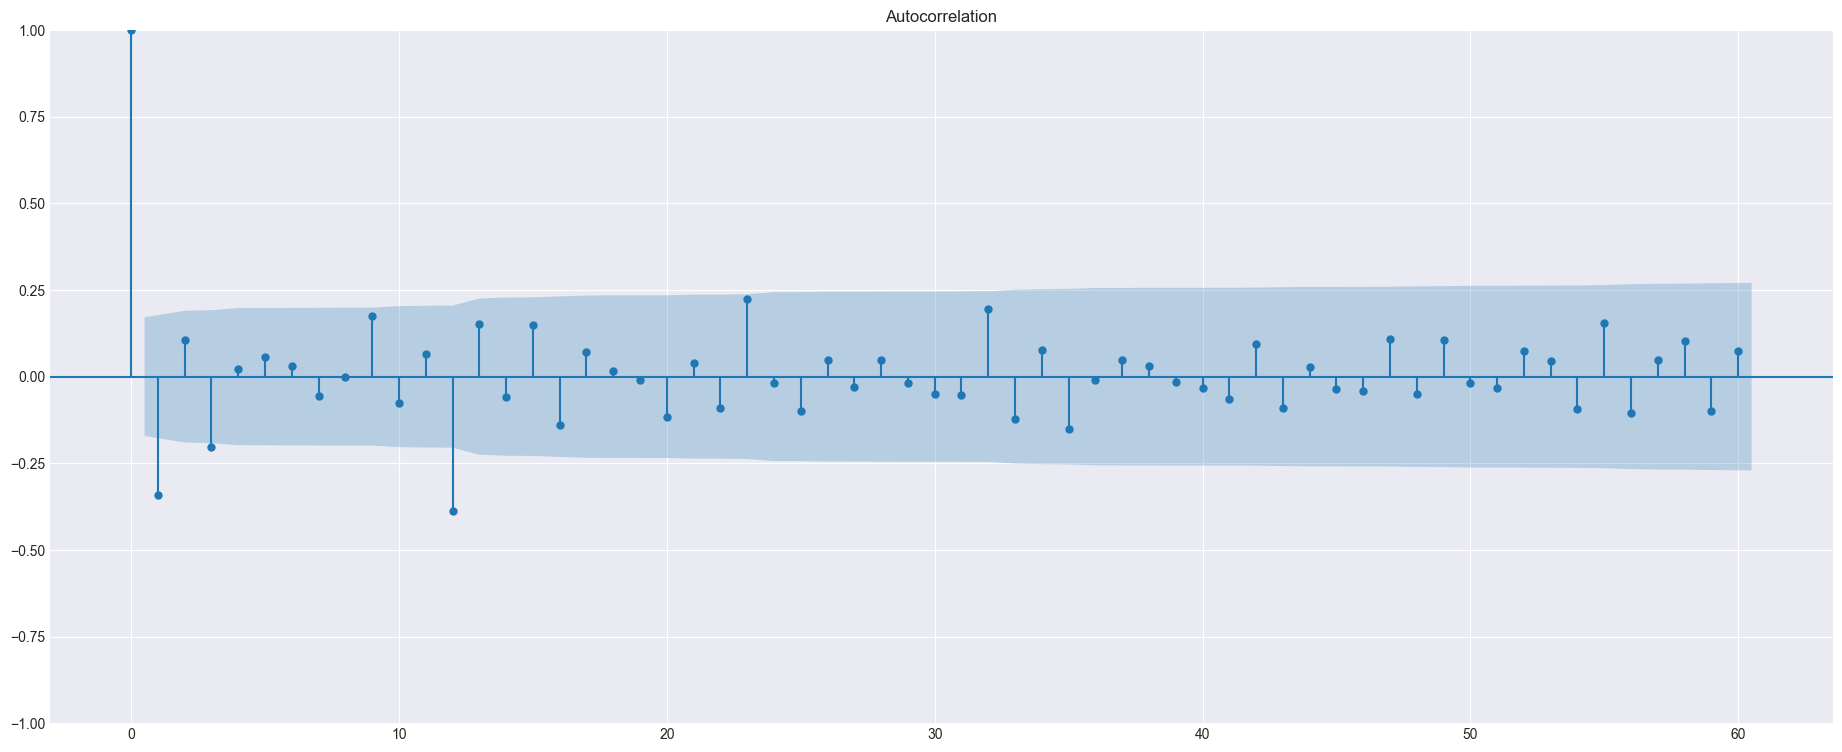

In [51]:
sm.graphics.tsa.plot_acf(df["y_stat"].dropna().values.squeeze(), lags=60);

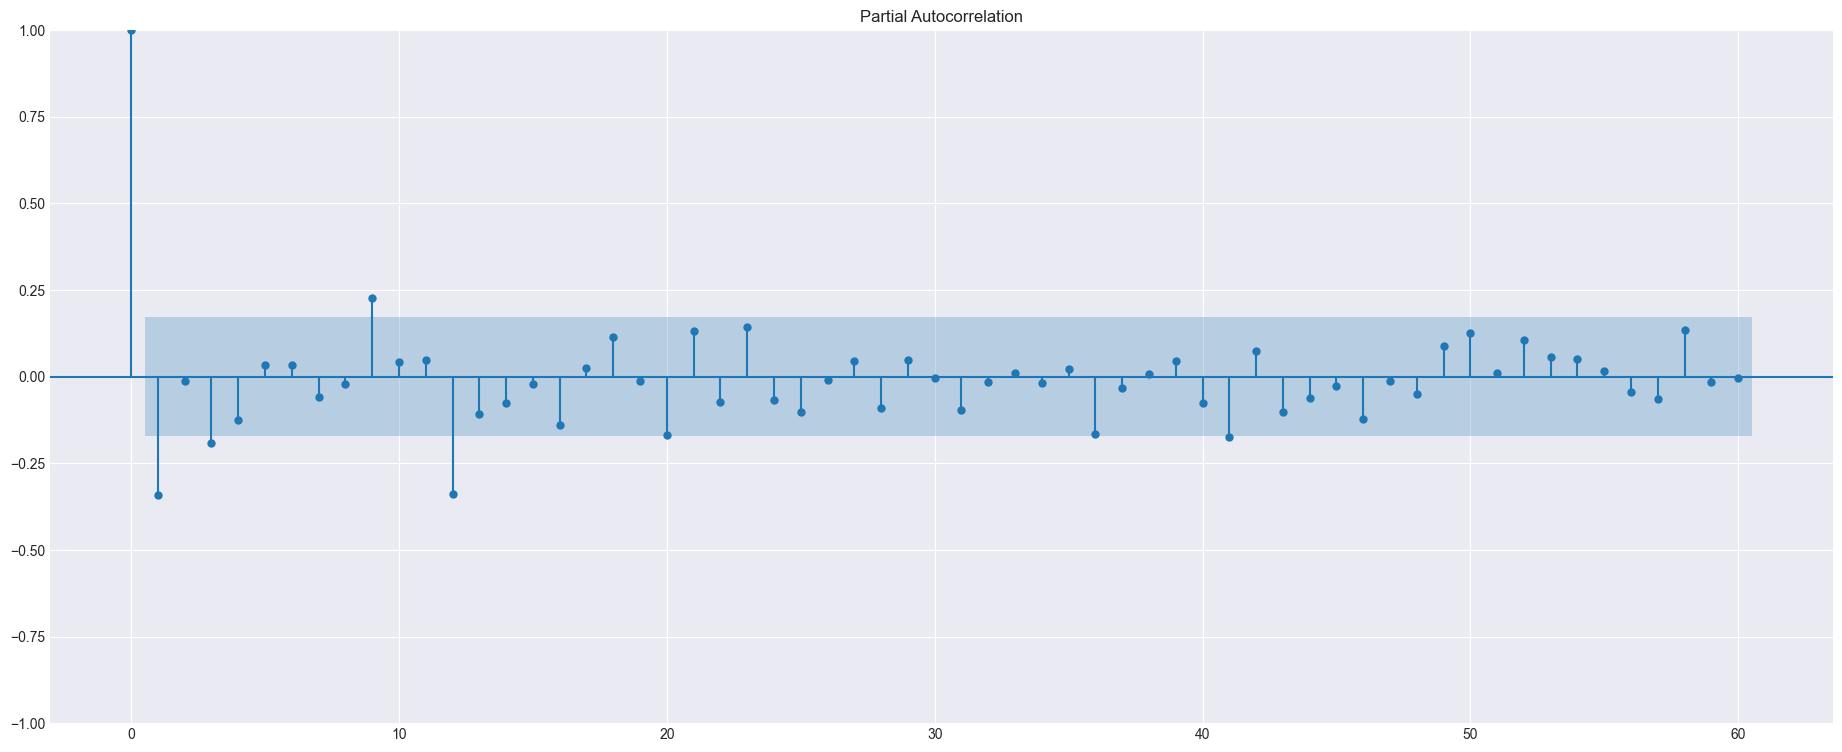

In [52]:
sm.graphics.tsa.plot_pacf(df["y_stat"].dropna().values.squeeze(), lags=60);

Соберем все это в пайпалйн

In [53]:
df = df[["ds", "unique_id", "y"]]

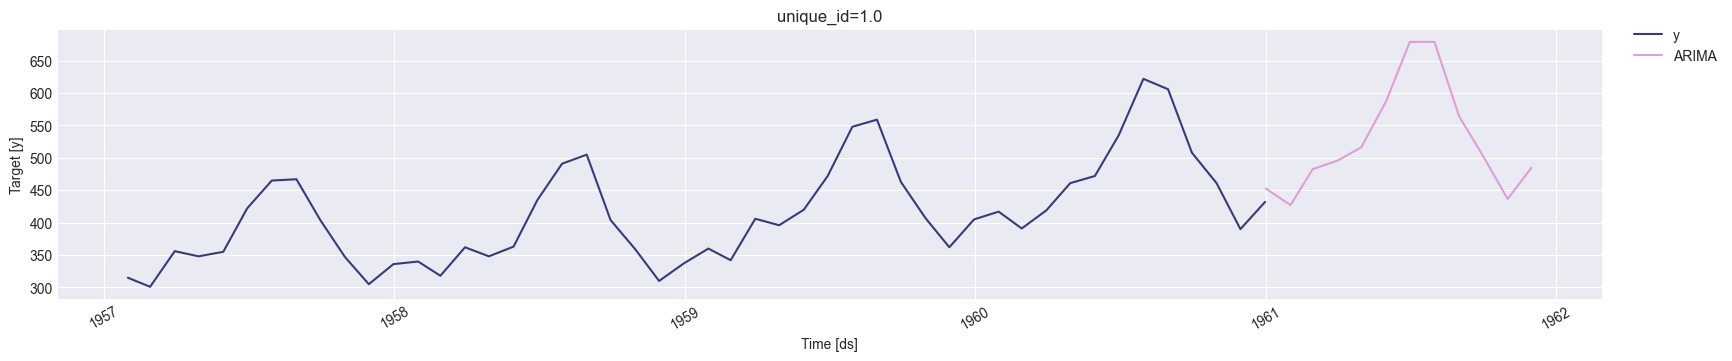

In [54]:
from statsforecast.models import ARIMA

models = [
    ARIMA(
        order=(1, 1, 1),
        season_length=12,
        seasonal_order=(1, 1, 1),
        # blambda=1  -- Not Implemented(???)
    ),
]

sf = StatsForecast(models=models, freq="MS")

df["y"] = np.log(df["y"])
forecast_df = sf.forecast(df=df, h=HORIZON)

df["y"] = np.exp(df["y"])
forecast_df["ARIMA"] = np.exp(forecast_df["ARIMA"])

sf.plot(df, forecast_df, max_insample_length=12 * 4)

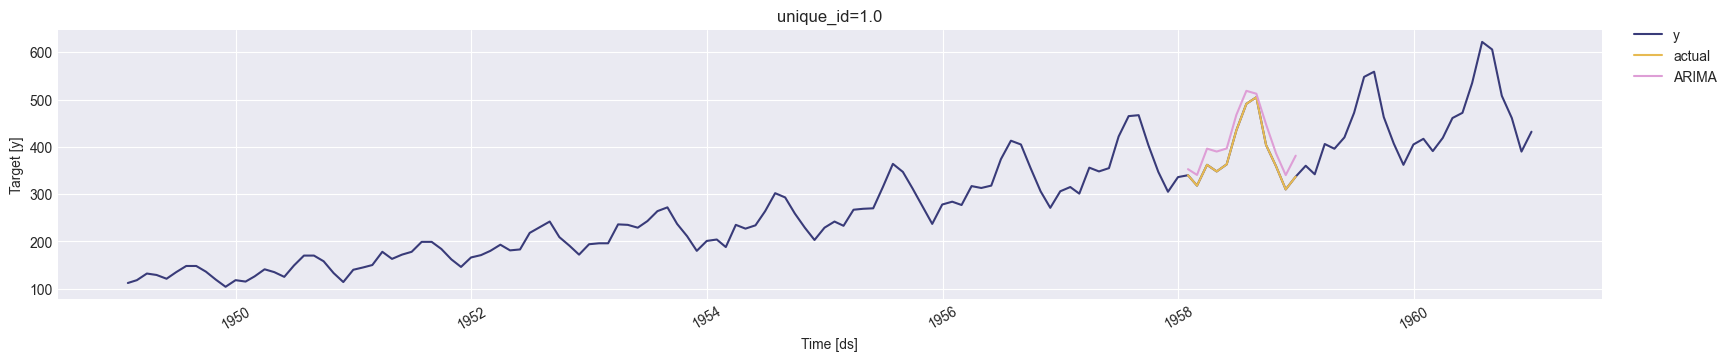

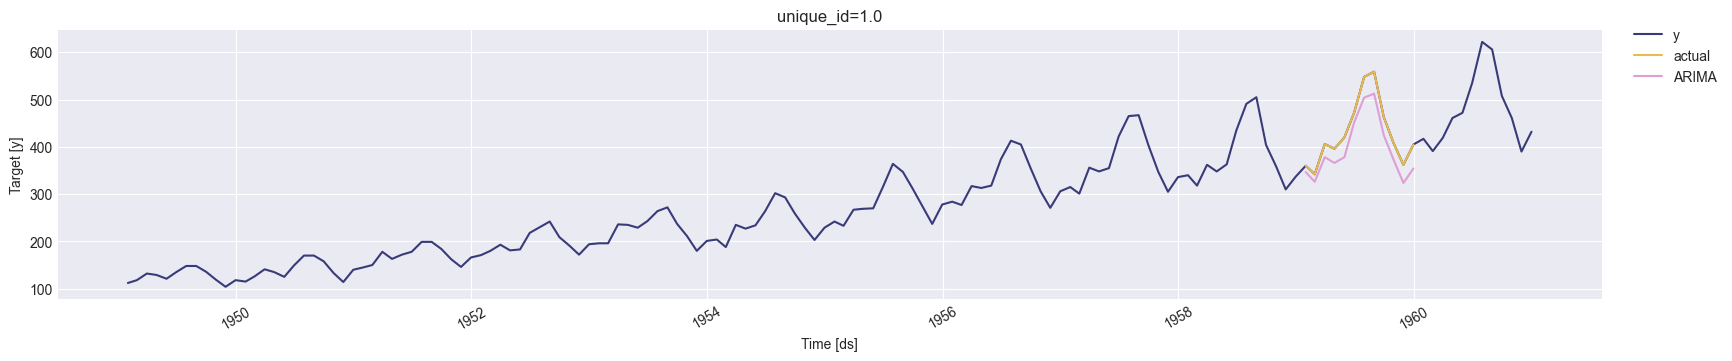

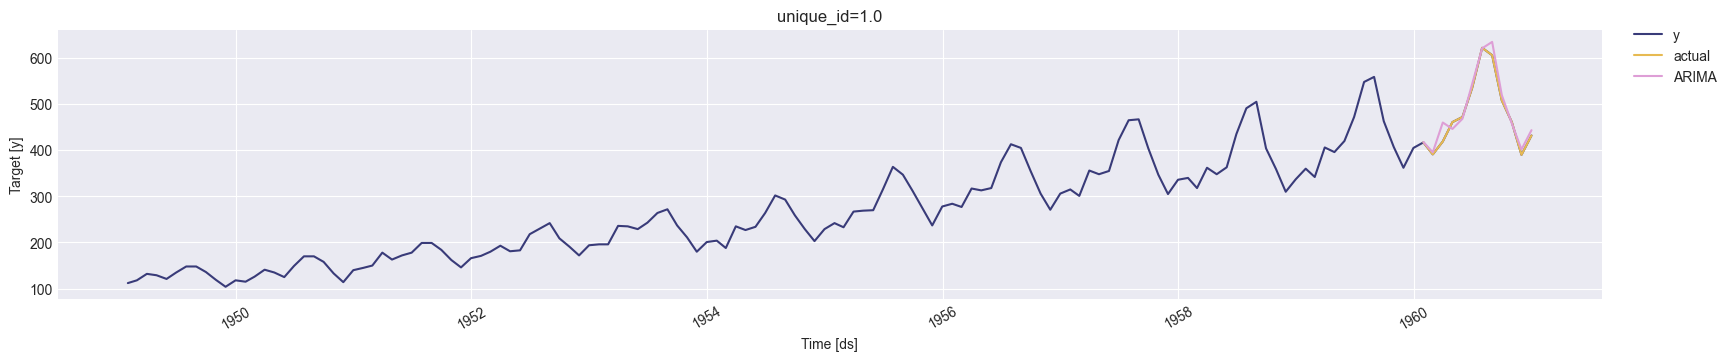

In [55]:
df["y"] = np.log(df["y"])
cv_df = sf.cross_validation(df=df, h=HORIZON, step_size=HORIZON, n_windows=N_FOLDS)
df["y"] = np.exp(df["y"])
cv_df["y"] = np.exp(cv_df["y"])
cv_df["ARIMA"] = np.exp(cv_df["ARIMA"])

plot_cv(df, cv_df)

Получаем что-то позоджее на HOTL

In [56]:
evaluate_cv(cv_df, mae)

unique_id     ARIMA best_model  best_metric
0        1.0  25.05633      ARIMA     25.05633

## Настройка модели(2)

А что делать если рядов в датасете много? 

Правильно -- пусть параметры подбираеются автоматически

In [57]:
from datasetsforecast.m4 import M4

In [58]:
group = "Hourly"
df, *_ = M4.load(directory="data", group=group)
n_series = len(np.unique(df.unique_id.values))
display_str = f"Group: {group} "
display_str += f"n_series: {n_series}"
print(display_str)

Group: Hourly n_series: 414


In [59]:
df.head()

unique_id ds      y
0        H1  1  605.0
1        H1  2  586.0
2        H1  3  586.0
3        H1  4  559.0
4        H1  5  511.0

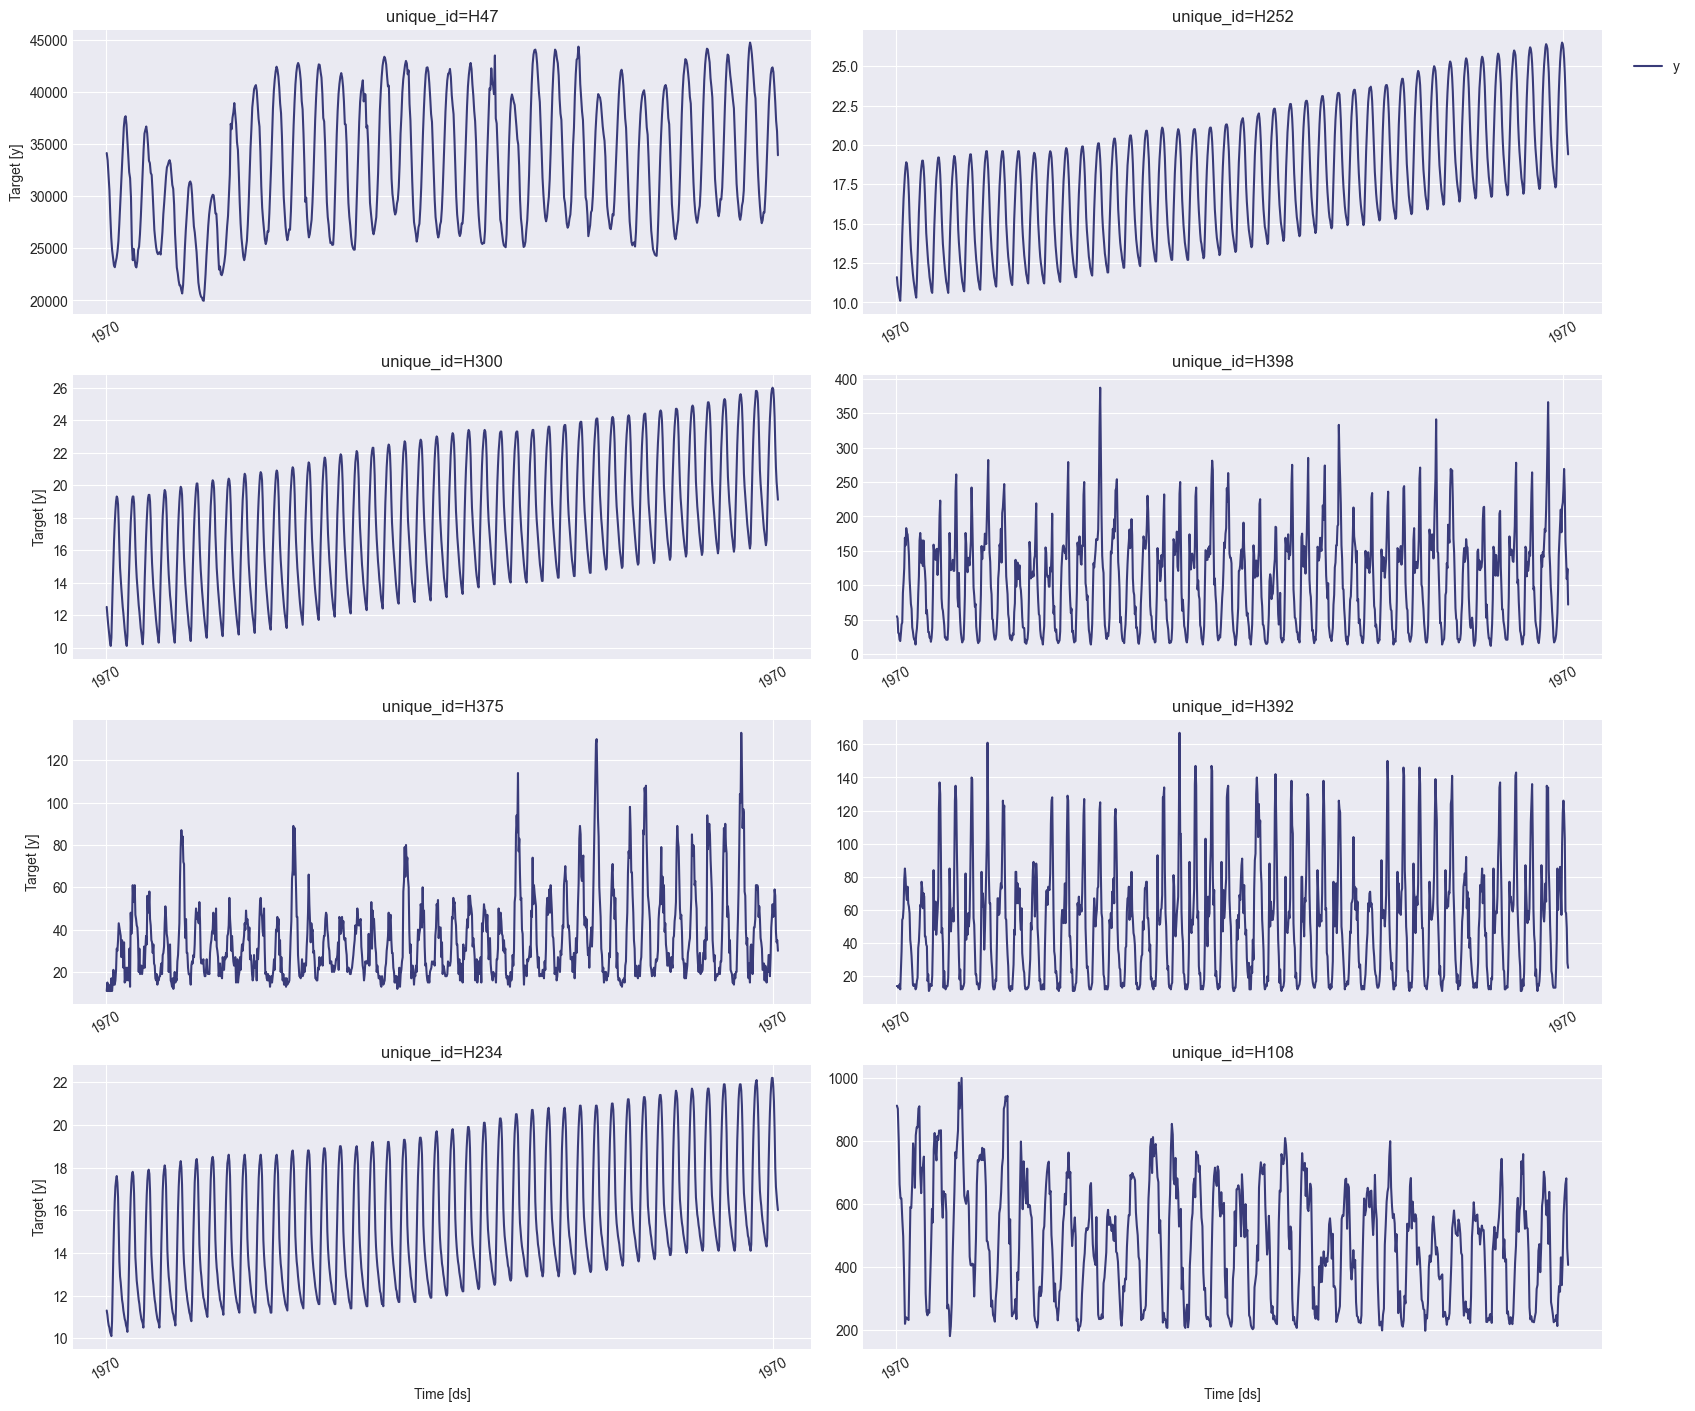

In [60]:
StatsForecast.plot(df)

Чтобы не слишком долго ждать выберем случайные 10 рядов

In [61]:
N_SEGMENTS = 10

np.random.seed(42)
sample_seg = np.random.choice(
    df["unique_id"].unique(),
    size=N_SEGMENTS,
    replace=False,
)
df_sample = df[df["unique_id"].isin(sample_seg)]

Небольшая предобработка -- добавим таймстемпы в датасет(сейчас там искусственные метки как в соревновании)

In [62]:
for seg in df_sample["unique_id"].unique():
    timestamp = pd.date_range(
        end="2025-01-01", freq="h", periods=df_sample[df_sample["unique_id"] == seg]["ds"].max() + 1
    )
    timestamp_mapping = {i + 1: time for i, time in enumerate(timestamp)}
    df_sample.loc[df_sample["unique_id"] == seg, "ds"] = df_sample["ds"].map(timestamp_mapping)

/Users/a.p.chikov/PycharmProjects/time-series-in-action-2025/.venv/lib/python3.11/site-packages/fs/__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)  # type: ignore
/Users/a.p.chikov/PycharmProjects/time-series-in-action-2025/.venv/lib/python3.11/site-packages/fs/__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)  # type: ignore
/Users/a.p.chikov/PycharmProjects/time-series-in-action-2025/.venv/lib/python3.11/site-packages/fs/__init__.py:4: UserWarning: pkg_resources

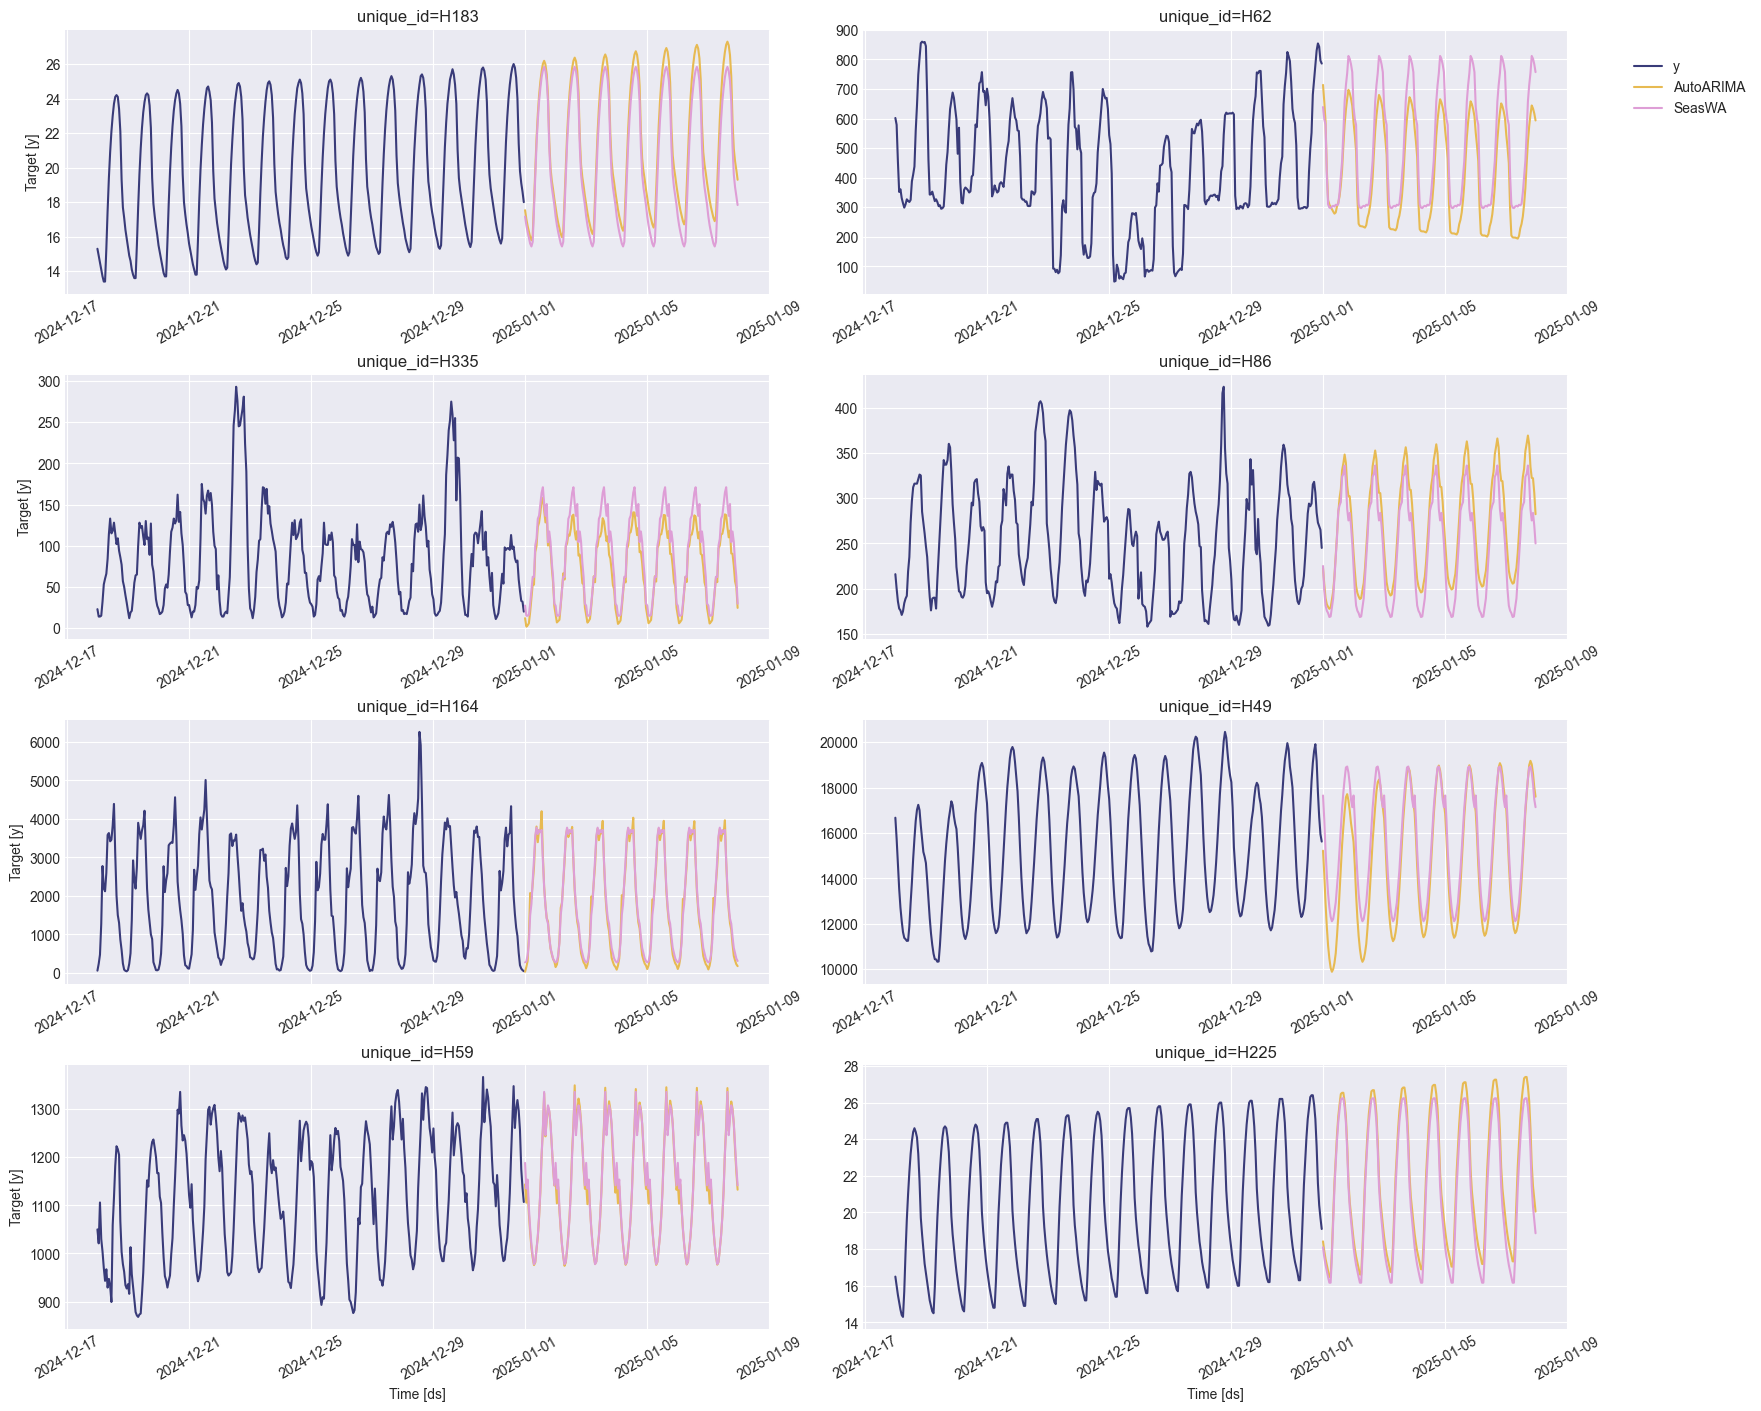

In [63]:
from statsforecast.models import AutoARIMA, SeasonalWindowAverage

HORIZON = 24 * 7

models = [
    AutoARIMA(
        # Период сезонности
        season_length=24,
        # Пространство перебора
        max_p=5,
        # ...
        # Ограничения на вид моделей
        max_order=5,  # p+q+P+Q
        stationary=False,
        seasonal=True,
        # Количество моделей для перебора(по дефолту 94)
        nmodels=10,
    ),
    SeasonalWindowAverage(season_length=24, window_size=3),
]

sf = StatsForecast(
    models=models,
    freq="h",
    n_jobs=10,  # Парралелизация по рядам
)

forecast_df = sf.forecast(df=df_sample, h=HORIZON)
sf.plot(df_sample, forecast_df, max_insample_length=24 * 14)

/Users/a.p.chikov/PycharmProjects/time-series-in-action-2025/.venv/lib/python3.11/site-packages/fs/__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)  # type: ignore
/Users/a.p.chikov/PycharmProjects/time-series-in-action-2025/.venv/lib/python3.11/site-packages/fs/__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)  # type: ignore
/Users/a.p.chikov/PycharmProjects/time-series-in-action-2025/.venv/lib/python3.11/site-packages/fs/__init__.py:4: UserWarning: pkg_resources

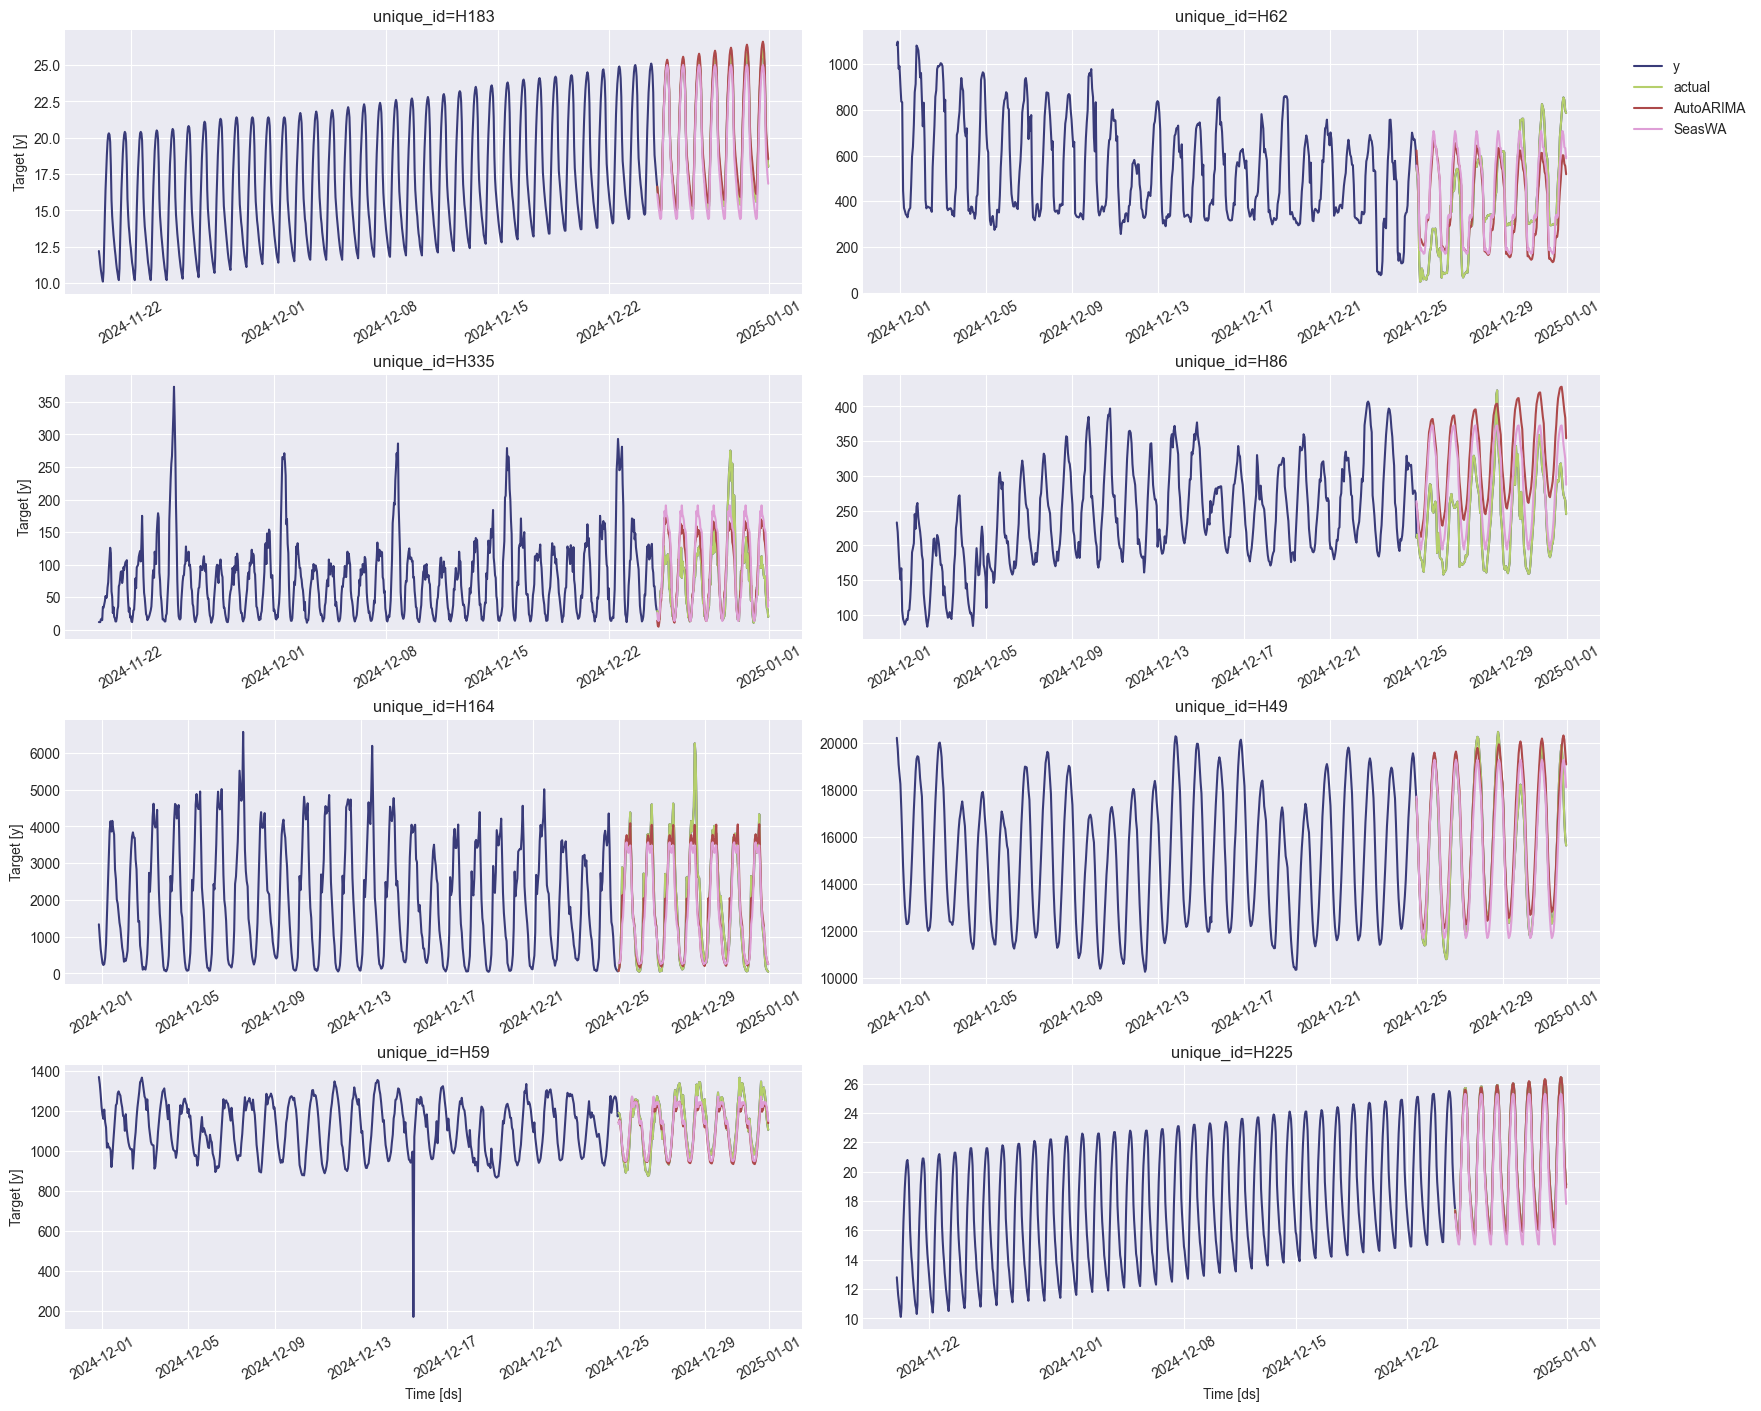

In [64]:
cv_df = sf.cross_validation(df=df_sample, h=HORIZON, step_size=HORIZON, n_windows=1)
plot_cv(df_sample, cv_df)

Не всегда SARMIAX обыгрывыет SMA(возможно можно было и оптимальнее модель подобрать)

In [65]:
evaluate_cv(cv_df, mae)

unique_id   AutoARIMA      SeasWA best_model  best_metric
0      H162   76.228494   93.220238  AutoARIMA    76.228494
1      H164  345.396688  441.575397  AutoARIMA   345.396688
2      H183    0.386602    0.659524  AutoARIMA     0.386602
3      H225    0.080897    0.767262  AutoARIMA     0.080897
4      H335   31.040269   36.551587  AutoARIMA    31.040269
5      H414   24.827349   28.876984  AutoARIMA    24.827349
6       H49  650.223229  611.638889     SeasWA   611.638889
7       H59   47.527507   42.077381     SeasWA    42.077381
8       H62  134.243677  120.375000     SeasWA   120.375000
9       H86   87.360992   47.539683     SeasWA    47.539683